<a href="https://colab.research.google.com/github/tariqzia5/ML_Bank-Insurance-marketing-/blob/main/Bank_Insurance_marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Data Link https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

Download bank marketing data. The dataset contains the details of the telephone marketing campaigns of a Portuguese bank.

# PROJECT OBJECTIVE 




## BACKGROUND :
A Portuguese retail bank was addressed, with data collected from 2008 to 2013. 
This data is related with direct marketing campaigns of the banking institution. 
The marketing campaigns were based on phone calls. The intent was to get the customer to subscribe (buy) to 
its product, which is, long term deposit scheme.
To facilitate this, often more than one call was made to a single client.
The telemarketing data was captured in a set of 150 features. It was further analyzed with respect to 
bank client, product and social-economic attributes and was narrowed down to 22 features.
Finally, a data-source file with 20 features and one desired target has been selected to formulate the proposed model
based on a data-driven approach.


## OBJECTIVE :
This project is a data mining approach to predict the success of telemarketing calls for selling 
bank long-term deposits. It aims to ascertain with a good probability, as to which of the clients
are the most likely to start a new long term deposit with them. A Data Model has to be created to predict this with an acceptable accuracy.

Selected data source file = bank-additional-full.csv


## BUSINESS LOGIC :
TERM DEPOSIT - A term deposit is sum of money which is deposited with the bank for a fixed number of years. It cannot be withdrawn before the completion of the term i.e. the number of years. It earns a fixed rate of interest annually. It is also known as a fixed deposit.

Since it is a deposit, there is no risk of delinquency involved. The bank does not have to get or share any credit score information with credit bureau. Hence, the decision making process would be the bank's internal process. 

The main objective is to predict the customers who will subscribe to the term deposit (buy the product) with maximum accuracy. Model explanation is not of paramount importance as the decision making would be internal in this case. So even the models following black-box method would be acceptable.


#Attribute Information:

Input variables:
## bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


## Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


##Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# DATA EXPLORATION AND VALIDATION


### Raw Data Exploration and Validation :
Check the validity of the raw data and do a quick sanity check.
1. Expected number of records or observations.
2. Expected number and name of variables
3. Proper name format of variables
4. Correct data type of values in a column. For ex. variable Age should have numbers and not dates.
5. Structured date format if any date variables.
6. Are there any unexpected variables ?

### Check for the following issues
Are there some of the below issues in data?
1. Wrong data type
2. Unstructured date format
3. Unwanted junk characters in strings
4. Missing values
5. Outliers*
6. Logical error values. For ex. Age < 0
7. Default values. For ex. Days since last contact = 9999
8. Inconsistent. Ex. Year of birth = 1970, Age = 25

*Outliers : Any numeric value that is far away from the median value of the distribution is called an Outlier. Presence of outlier will impact the mean value and other statistical measures as well. Thus, it will bias the predicted values made by a model. Outliers must be treated before model building.

In [1]:
import pandas as pd

bank_data = pd.read_csv("https://raw.githubusercontent.com/tariqzia5/ML_Bank-Insurance-marketing-/main/bank-additional-full.csv", sep = ";")
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

FINDING : There are no null values in any of the variables.

In [2]:
bank_data.head(10).append(bank_data.tail(10))

<ipython-input-2-b5c6d2c13eb6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank_data.head(10).append(bank_data.tail(10))


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Exploration

* Continuous variable : Numeric variable which can take every possible value within a given range. Ex. salary, percentage. Continuous variables are of decimal datatype generally.

* Discrete variable : Numberic variable which can take only whole number or discrete values in a given range. Ex. number of loans, number of dependents. Discrete variable is ordinal, it can be ordered or sorted.

Sometimes depending on the number of distinct values in a range, we can classify the variable as discrete if the distinct count is less. If the count is more then we can take them as continuous.

* Categorical variable - Variable that cannot be ordered or sorting does not make sense. Generally strings. Ex. Region (north, south, east, west), zipcode (although a number, it is code. We cannot say one zipcode is greater than another).

## Categorical and Discrete Variables

To explore any variable, we can check the frequency of occurence of its values (Frequency Table). It will give us three information - 1. Number of distinct values 2. the distinct values. 3. count of occurence (frequency) of each value. From these parameters, we can classify the variable into one of the above categories, as well be able to check if the variable has any of the issues mentioned earlier.

## 1. age

Age of client in years. Numeric integer variable.
Discrete. Expected range between 18 and 100.

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


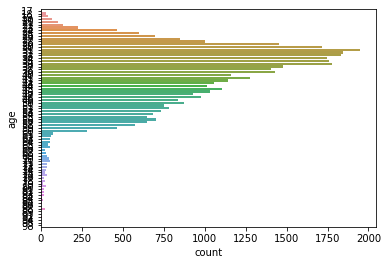

In [ ]:
# Using frequency table to analyze discrete variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(bank_data["age"].value_counts())
sns.countplot(y= "age", data = bank_data)

In [ ]:
# Analyze every single value available for age

age_tab1 = bank_data[bank_data['age'] <= 20]
age_tab1['age'].value_counts()
# 5 records for age = 17

age_tab1[age_tab1['age'].isin([17,18])]
# Checking and comparing data for 17 year olds and 18 year olds, the data looks valid. 17 is not an outlier.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24110,18,student,single,high.school,no,no,no,telephone,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.245,5195.8,no
27792,18,student,single,high.school,no,yes,yes,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.687,5099.1,no
30142,18,student,single,basic.4y,no,no,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
30349,18,student,single,basic.4y,no,yes,yes,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
35871,18,student,single,high.school,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.259,5099.1,yes
35872,18,student,single,high.school,no,yes,no,cellular,may,fri,...,1,1,2,success,-1.8,92.893,-46.2,1.259,5099.1,no
37125,18,student,single,basic.9y,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no


In [ ]:
age_tab2 = bank_data[(bank_data['age'] > 20) & (bank_data['age'] <= 30)]
age_tab2['age'].value_counts()

age_tab2 = bank_data[(bank_data['age'] > 30) & (bank_data['age'] <= 40)]
age_tab2['age'].value_counts()

age_tab2 = bank_data[(bank_data['age'] > 40) & (bank_data['age'] <= 50)]
age_tab2['age'].value_counts()

age_tab2 = bank_data[(bank_data['age'] > 50) & (bank_data['age'] <= 60)]
age_tab2['age'].value_counts()

age_tab2 = bank_data[(bank_data['age'] > 60) & (bank_data['age'] <= 80)]
age_tab2['age'].value_counts()

age_tab2 = bank_data[(bank_data['age'] > 75) & (bank_data['age'] <= 100)]
age_tab2['age'].value_counts()

age_tab2 = bank_data[bank_data['age'] > 100]
age_tab2['age'].value_counts() # no records

# After running all these statements one by one it was found that all the values of age are logically associated with other variables in an expected manner.
# No unexpected values


Series([], Name: age, dtype: int64)

Business logic : 

A person below the age of 18 can open a term deposit with a bank if assisted by an adult guardian. So 17 is a valid age. 

Similarly, on the higher end, a person at the age 88 may also open a term deposit. In case of death, the term deposit is transferred to their nominee or legal heir. So the likelihood that people at the age of 88 may open a term deposit is still moderate.
 

FINDINGS : age seems ok. No cleaning required.

# 2. job

type of job - 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'

Categorical variable

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


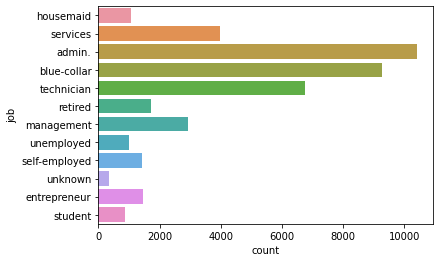

In [ ]:
# Frequency table to analyze data
print(bank_data['job'].value_counts())
sns.countplot(y='job', data  = bank_data)

In [ ]:
# Calculate percentage of unknown
bank_data['job'].value_counts()/len(bank_data['job'])

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

FINDINGS: 
unknown = 0.80%, 330 records.
We can impute based on target

# 3. marital

 marital status: categorical: 'divorced', 'married', 'single', 'unknown'; 
 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


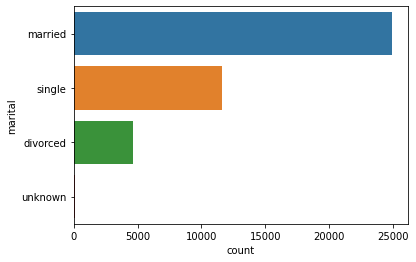

In [ ]:
# Frequency table to analyze data
print(bank_data['marital'].value_counts())
sns.countplot(y='marital', data  = bank_data)

In [ ]:
# Percentage of unknown
bank_data['marital'].value_counts()/len(bank_data['marital'])

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

FINDINGS: unknown = 0.19%, 80 records. We can impute based on target

# 4. education

 categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


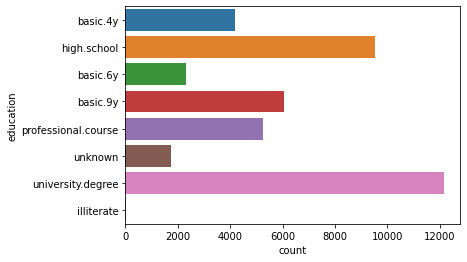

In [ ]:
# Frequency table to analyze data
print(bank_data['education'].value_counts())
sns.countplot(y= 'education', data = bank_data)

In [ ]:
# Percentage of unknown
bank_data['education'].value_counts()/len(bank_data['education'])

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

FINDINGS: unknown = 4.20%, 1731 records. We can impute based on target

# 5. default

Has credit in default? (categorical: 'no', 'yes', 'unknown')

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


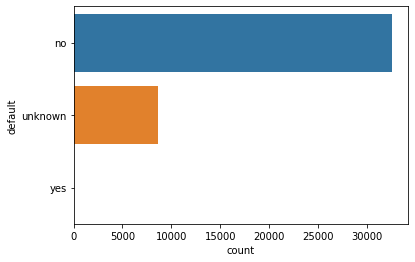

In [ ]:
# Frequency table to analyze data
print(bank_data['default'].value_counts())
sns.countplot(y= 'default', data = bank_data)

In [ ]:
# Percentage of unknown
bank_data['default'].value_counts()/len(bank_data['default'])

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

FINDINGS: unknown = 20.87%, 8597 records. We can rename the unknown values to Missing or leave it as it is, considering 'unknown' as a distinct class. We can also create a flag variable. Flag = 1 when default is 'yes' or 'no'. Flag = 0 when default = 'unknown'. 

# 6. housing

housing: Has housing loan? (categorical: 'no', 'yes', 'unknown')

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


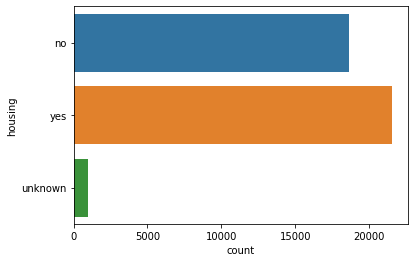

In [ ]:
# Frequency table to analyze data
print(bank_data['housing'].value_counts())
sns.countplot(y= 'housing', data = bank_data)

In [ ]:
# Percentage of unknown
bank_data['housing'].value_counts()/len(bank_data['housing'])

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

FINDINGS: unknown = 2.4%, 990 records. We can impute based on target.

# 7. loan

Has personal loan? (categorical: 'no', 'yes', 'unknown')

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


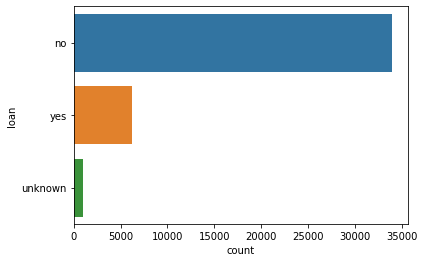

In [ ]:
# Frequency table to analyze data
print(bank_data['loan'].value_counts())
sns.countplot(y= 'loan', data = bank_data)

In [ ]:
# Percentage of unknown
bank_data['loan'].value_counts()/len(bank_data['loan'])

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

FINDINGS: unknown = 2.4%, 990 records. We can impute based on target.
(Same number of unknown as housing variable.)

# 8. contact
Contact communication type (categorical: 'cellular', 'telephone') 

cellular     26144
telephone    15044
Name: contact, dtype: int64


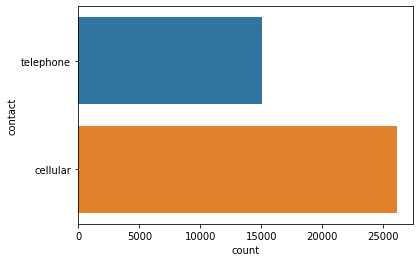

In [ ]:
# Frequency table to analyze data
print(bank_data['contact'].value_counts())
sns.countplot(y= 'contact', data = bank_data)

FINDINGS: No unknown or null values. Data is fine. Cleaning not required.

# 9. month

Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


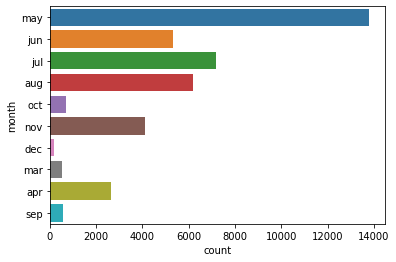

In [ ]:
# Frequency table to analyze data
print(bank_data['month'].value_counts())
sns.countplot(y = 'month', data = bank_data)

FINDINGS: No unknown or null values. No odd values. Data is fine. Cleaning not required.

# 10. day_of_week
Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


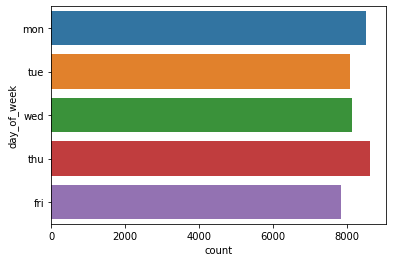

In [ ]:
# Frequency table to analyze data
print(bank_data['day_of_week'].value_counts())
sns.countplot(y = 'day_of_week', data = bank_data)

FINDINGS: No unknown or null values. No odd values. Data is fine. Cleaning not required.

# 12. campaign
Number of contacts performed during this campaign and for this client. Numeric values.
Discrete variable. Minimum = 1. Positive integer values.

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


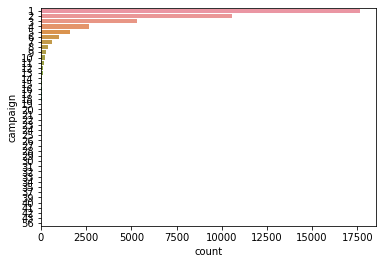

In [ ]:
# Frequency table to analyze data
print(bank_data['campaign'].value_counts())
sns.countplot(y = 'campaign', data = bank_data)

In [ ]:
# checking min and max values
print(bank_data['campaign'].min())
print(bank_data['campaign'].max())

# checking few high value data records
bank_data[bank_data['campaign']==56]
bank_data[bank_data['campaign']==40]

1
56


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


FINDINGS : Data seems ok. No outliers found. Min value= 1. Max value= 56. 
No cleaning required.

# 13. pdays
Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). Discrete variable. Min = 0

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


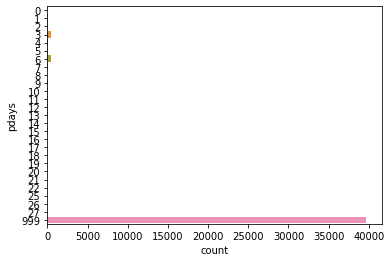

In [ ]:
# Frequency table to analyze data
print(bank_data['pdays'].value_counts())
sns.countplot(y = 'pdays', data = bank_data)

In [ ]:
# Checking min and max values
print(bank_data['pdays'].min())
print(bank_data['pdays'][bank_data['pdays']!=999].max())

# checking pdays and campaign relation for few sample data. Sanity check
bank_data[['pdays','campaign']][bank_data['campaign'].isin([1,2])]
bank_data[['pdays','campaign']][bank_data['campaign'].isin([10,11])]
bank_data[['pdays','campaign']][bank_data['campaign'].isin([40,56])]
bank_data[['pdays','campaign']][bank_data['pdays'].isin([3,6,5,10,20,21,27])]
bank_data[['pdays','campaign']][bank_data['pdays'].isin([3,6])]
bank_data[['pdays','campaign']][bank_data['pdays'].isin([5,10])]
bank_data[['pdays','campaign']][bank_data['pdays'].isin([20,21,27])]
bank_data[['pdays','campaign']][bank_data['pdays'].isin([0])]


0
27


,pdays,campaign
25497,0,1
25996,0,3
30238,0,1
30314,0,1
30417,0,1
30688,0,1
40360,0,1
40364,0,1
40365,0,1
40376,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff60877f490>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff60877ff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff608776ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff608786a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff608786f50>],
 'means': []}

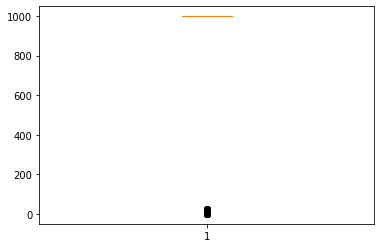

In [ ]:
# Box-plot for pdays
plt.boxplot(bank_data['pdays'])

# Box plot shows how the model would treat the variable. Except 999 all values are being shown as huge outliers.

FINDINGS : Default value for not contacted  = 999. Outher than that, data seems ok. No outliers or missing values detected. 

However, the percentage of default values is 999 which is an outlier compare to rest of the values. Percentage of default value = 96.5%. Which means that the meaningful data is the rest 3.5%. The model will treat these 3.5% as outlier and 999 as normal which is incorrect. It is better to drop this column and use a flag variable instead.

# 14. previous
Number of contacts performed before this campaign and for this client. Numeric values. Discrete variable. Min= 0.

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


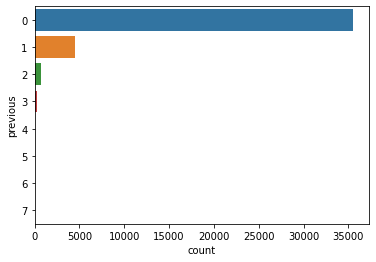

In [ ]:
# Frequency table to analyze data
print(bank_data['previous'].value_counts())
sns.countplot(y = 'previous', data = bank_data)

In [ ]:
# checking for any relation with 'campaign' and 'pdays'

bank_data[['campaign','pdays', 'previous']][bank_data['previous']==0]
bank_data[['campaign','pdays', 'previous']][bank_data['previous']==1]
bank_data[['campaign','pdays', 'previous']][bank_data['previous']==4]

# checking for 'previous' values where 'pdays' = 999
# which means, when the client was not contacted in the previous campaign, what is the number of contacts made before this campaign

bank_data['previous'][bank_data['pdays']==999].unique()
bank_data[(bank_data['pdays']==999) & (bank_data['previous']!=0)] ## 4110 records

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


FINDINGS: There are 4110 records where the client was not contacted in the previous campaign, but there was atleast 1 call made before this campaign. So either, these calls were not a part of any campaign, or these 4110 records have logical error. Further investigation required.

In [ ]:
# keeping these 4110 records under observation
observation1 = bank_data[(bank_data['pdays']==999) & (bank_data['previous']!=0)]
observation1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


# 15. poutcome
Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


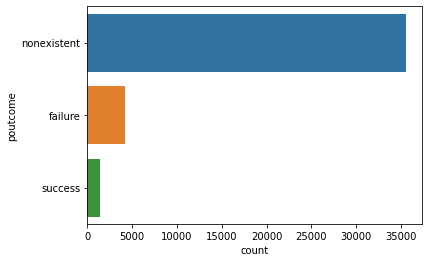

In [ ]:
# Frequency table to analyze data
print(bank_data['poutcome'].value_counts())
sns.countplot(y = 'poutcome', data = bank_data)

In [ ]:
bank_data['pdays'][bank_data['poutcome']=='nonexistent'].unique() # 999
# for all records where previous outcome is nonexistent, which means customer previous contact data is not available, pdays is 999, which means customer was not contacted. So, data is logically correct.

# Checking for correct logic - When customer was not contacted previously, was the previous outcome = failure. Logically, it should be non-existent, not failure.
bank_data['pdays'][bank_data['poutcome']=='failure'].unique()
bank_data[(bank_data['poutcome']=='failure') & (bank_data['pdays']==999)] # 4110 records. This is logically not correct.

# Checking for correct logic - When  the previous outcome = success, was the customer was contacted in previous campaign (pdays != 999)
bank_data['pdays'][bank_data['poutcome']=='success'].unique()
# There are no values of pdays =999. From the result we can infer that the logic is correct in this case.

array([ 6,  4,  3,  5,  1,  0, 10,  7,  8,  9,  2, 11, 12, 13, 14, 15, 16,
       18, 22, 26, 17, 19, 27])

In [ ]:
# Dataset A
# client was not contacted in the previous campaign; but there was atleast 1 call made before this campaign; outcome of previous campaign = failure
observation1[observation1['poutcome']=='failure'] # = observation1 dataset

# Dataset B
# client was not contacted in the previous campaign; outcome of previous campaign = failure
bank_data[(bank_data['poutcome']=='failure') & (bank_data['pdays']==999)]

bank_data['previous'][(bank_data['poutcome']=='failure') & (bank_data['pdays']==999)].unique()
# Conclusion : Both these datasets are the same

array([1, 2, 3, 4, 5, 6])

FINDINGS: when previous outcome is failure, in 4110 records they have not been contacted. Which means that poutcome should be 'nonexistent' instead of 'failure'. Again this set of 4110 is the same as Observation1 set of data.

4110 is approximately 10% of the data. 'pdays' may be imputed based on target if required. It will fix the logical discrepancy with the other two variables.

# 16. emp.var.rate

Employment variation rate - quarterly indicator (numeric)

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64
0
0.08188550063125165
1.1


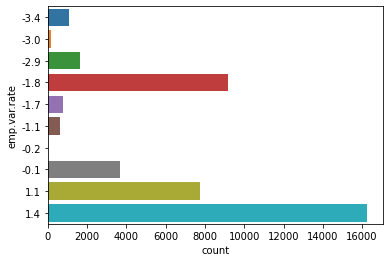

In [ ]:
# Checking frequency table
print(bank_data['emp.var.rate'].value_counts()) # discrete variable
print(bank_data['emp.var.rate'].isnull().sum()) # No null values
print(bank_data['emp.var.rate'].mean()) # 0.08
print(bank_data['emp.var.rate'].median()) # 1.1 

sns.countplot(y='emp.var.rate', data=bank_data)

FINDINGS: Data seems fine. No cleaning required.

# Continuous Variable Exploration



Continuous variables will have a lot of unique values. So, frequency table will not give a good idea. For, continuous variables we use percentile distribution with the help of a Box Plot.
* Percentile - Percentile describes how a score compares to other scores in the same dataset. Ex. 25 percentile value = 50, means 25% data points are below the value of 50, and 75% data points are above 50.
* Box plot - Shows the data graphically as a box with 2 whiskers on either side. the lower end of the box body is 25 %ile value while the upper end is 75 %ile value. 50 %ile value or median is also shown. The whiskers are drawn till the actual minumum and maximum values or the values predicted by the plot. Box plots whiskers generally have a length of 1.5*IQR. (IQR = Inter Quartile Range = difference between 75 %ile and 25 %ile.)

### Outlier Detection

Any values outside the range of the box plot will be shown as hollow dots. In the presence of outliers, the box plot is compressed as the scale of y-axis increases to accomodate the outlier value. If there are huge outliers, the box plot may be compressed to a line.

# 11. duration
Last contact duration, in seconds (numeric)
Continuous variable. Minimum value  = 0

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

y = has the client subscribed a term deposit? (binary: 'yes', 'no')

In [ ]:
# Checking if target y = no when duration is 0 in all such records.
print(bank_data['y'][bank_data['duration']==0].unique()) # Result is true and as expected.

# Percentile distribution and summary statistics
print(bank_data['duration'].min())
print(bank_data['duration'].max())
print(bank_data['duration'].mean())
print(bank_data['duration'].median())
print(bank_data['duration'].var())
print(bank_data['duration'].std())

print(bank_data['duration'].isnull().sum()) # No nulls

dur_percentile = bank_data['duration'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
round(dur_percentile, 2)
# Max value of 4918 seems much higher than the median value of 180, and 90 percentile value of 551



['no']
0
4918
258.2850101971448
180.0
67225.72887720143
259.2792488364648
0


0.00       0.0
0.05      36.0
0.10      59.0
0.25     102.0
0.40     146.0
0.50     180.0
0.75     319.0
0.80     368.0
0.90     551.0
1.00    4918.0
Name: duration, dtype: float64

644.5


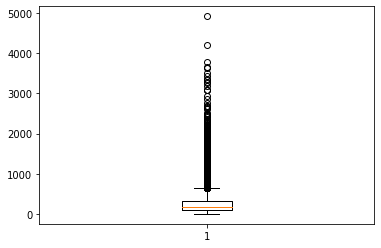

In [ ]:
# Boxplot
plt.boxplot(bank_data['duration'])

# boxplot clearly shows the presence of many outliers

iqr = 319-102 
max = 319 + (iqr*1.5)
print(max)
# max value as per boxplot should be around 644.50

In [ ]:
# checking percentage of outliers
dur_percentile = bank_data['duration'].quantile([0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
round(dur_percentile, 2)


0.90     551.00
0.91     581.00
0.92     614.00
0.93     653.00
0.94     699.00
0.95     752.65
0.96     820.52
0.97     911.00
0.98    1052.26
0.99    1271.13
Name: duration, dtype: float64

FINDINGS:
considering 700 as maximum acceptable value,
94 percentile values are within acceptable range. Beyond this, there are outliers.
So outliers = 6%

Data cleaning is required. Since, percent of outliers is less than 10%, we can impute them with median value (median = 180).

# 17. cons.price.idx
cons.price.idx: consumer price index - monthly indicator (numeric)

In [ ]:
# Checking frequency table
print(bank_data['cons.price.idx'].value_counts()) # Continuous variable

print(bank_data['cons.price.idx'].isnull().sum()) # No null values

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64
0


92.201
94.767
93.57566436826262
93.749
0.3350558022732152
0.5788400489541262
0.00    92.20
0.05    92.71
0.10    92.89
0.25    93.08
0.40    93.44
0.50    93.75
0.75    93.99
0.80    93.99
0.90    94.46
1.00    94.77
Name: cons.price.idx, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff6084f3bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff6084f8690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff6084f3690>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6084ff190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6084ff6d0>],
 'means': []}

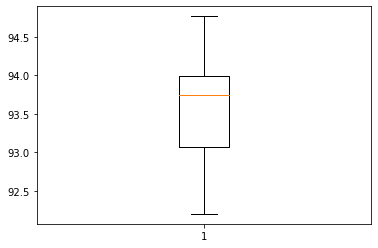

In [ ]:
# Percentile distribution and summary statistics
print(bank_data['cons.price.idx'].min())
print(bank_data['cons.price.idx'].max())
print(bank_data['cons.price.idx'].mean())
print(bank_data['cons.price.idx'].median())
print(bank_data['cons.price.idx'].var())
print(bank_data['cons.price.idx'].std())


cons_percentile = bank_data['cons.price.idx'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(cons_percentile, 2))

# Boxplot
plt.boxplot(bank_data['cons.price.idx'])


FINDINGS : All the values are evenly distributed. No outliers or missing values. Data is clean. No cleaning required.

# 18. cons.conf.idx
consumer confidence index - monthly indicator (numeric)

In [ ]:
# Checking frequency table
print(bank_data['cons.conf.idx'].value_counts()) # Continuous variable

print(bank_data['cons.conf.idx'].isnull().sum()) # No null values

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64
0


-50.8
-26.9
-40.50260027192386
-41.8
21.42021539589864
4.628197856174544
0.00   -50.8
0.05   -47.1
0.10   -46.2
0.25   -42.7
0.40   -42.0
0.50   -41.8
0.75   -36.4
0.80   -36.4
0.90   -36.1
1.00   -26.9
Name: cons.conf.idx, dtype: float64
1.09


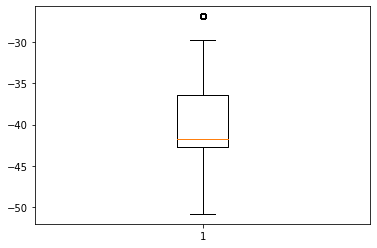

In [ ]:
# Percentile distribution and summary statistics
print(bank_data['cons.conf.idx'].min())
print(bank_data['cons.conf.idx'].max())
print(bank_data['cons.conf.idx'].mean())
print(bank_data['cons.conf.idx'].median())
print(bank_data['cons.conf.idx'].var())
print(bank_data['cons.conf.idx'].std())


cons_percentile = bank_data['cons.conf.idx'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(cons_percentile, 2))

# Boxplot
plt.boxplot(bank_data['cons.conf.idx'])

# only one value -26.9 (which is the max value) seems like an outlier. Rest all are within range of -51 to -30
# percentage of outlier =
print(round(447*100/41188 ,2)) # 1.09%

FINDINGS : Outlier = 1.09%. Rest all seems fine.
Data has to be cleaned. Impute with Median value.

# 19. euribor3m
euribor 3 month rate - daily indicator (numeric)

In [ ]:
# Checking frequency table
print(bank_data['euribor3m'].value_counts()) # Continuous variable

print(bank_data['euribor3m'].isnull().sum()) # No null values

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64
0


0.634
5.045
3.621290812858114
4.857
3.0083078001952948
1.734447404851267
0.00    0.63
0.05    0.80
0.10    1.05
0.25    1.34
0.40    4.19
0.50    4.86
0.75    4.96
0.80    4.96
0.90    4.96
1.00    5.04
Name: euribor3m, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff60844ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff60844e950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff60844a9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff608456450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff608456950>],
 'means': []}

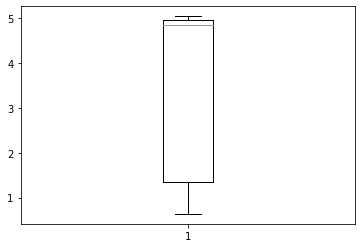

In [ ]:
# Percentile distribution and summary statistics
print(bank_data['euribor3m'].min())
print(bank_data['euribor3m'].max())
print(bank_data['euribor3m'].mean())
print(bank_data['euribor3m'].median())
print(bank_data['euribor3m'].var())
print(bank_data['euribor3m'].std())


cons_percentile = bank_data['euribor3m'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(cons_percentile, 2))

# Boxplot
plt.boxplot(bank_data['euribor3m'])


FINDINGS: Data looks fine. No null values or outliers detected.

# 20. nr.employed
number of employees - quarterly indicator (numeric)

In [ ]:
# Checking frequency table
print(bank_data['nr.employed'].value_counts()) # Continuous variable

print(bank_data['nr.employed'].isnull().sum()) # No null values

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64
0


4963.6
5228.1
5167.035910944936
5191.0
5220.283250397495
72.25152766826108
0.00    4963.6
0.05    5017.5
0.10    5076.2
0.25    5099.1
0.40    5191.0
0.50    5191.0
0.75    5228.1
0.80    5228.1
0.90    5228.1
1.00    5228.1
Name: nr.employed, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff6083b5b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff6083bc650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff6083b5650>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6083c4150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6083c4690>],
 'means': []}

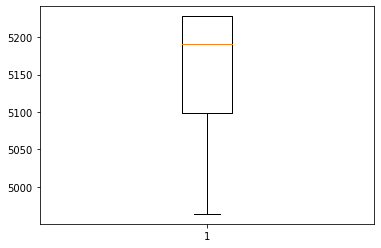

In [ ]:
# Percentile distribution and summary statistics
print(bank_data['nr.employed'].min())
print(bank_data['nr.employed'].max())
print(bank_data['nr.employed'].mean())
print(bank_data['nr.employed'].median())
print(bank_data['nr.employed'].var())
print(bank_data['nr.employed'].std())


cons_percentile = bank_data['nr.employed'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(cons_percentile, 2))

# Boxplot
plt.boxplot(bank_data['nr.employed'])

FINDINGS: Data looks fine. No null values or outliers detected.

# Target Variable

# 21. y (Target)
Target/Output variable. Has the client subscribed a term deposit? (binary: 'yes', 'no'). Categorical variable

no     36548
yes     4640
Name: y, dtype: int64


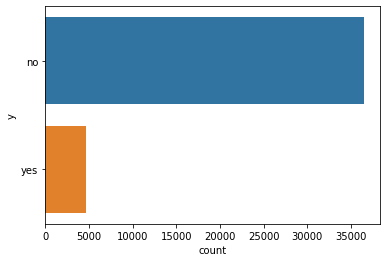

In [ ]:
# Frequency table to analyze data
print(bank_data['y'].value_counts())
sns.countplot(y = 'y', data = bank_data)


FINDINGS : Variable is clean. No cleaning is required.

# DATA CLEANING AND DATA PREPARATION

# Continuous Variables Cleaning


* Find out the percentage of data with issues.
* If the %age of data with issue is greater than 50%, the we cannot use that variable as it has skewed data. Better to create a flag variable. Flag variable = 1 when proper data is present, flag variable = 0 when data has issues.
* If %age is less than 10% then we can replace the data with issues with the median value.
* If the %age is between 10% and 50%, we replace the value with median as well as create a flag variable. We should be careful when using this variable.

# 11. 'duration' Cleaning

0.00      0.00
0.10     59.00
0.20     89.00
0.30    116.00
0.40    146.00
0.50    180.00
0.60    196.00
0.70    243.00
0.80    311.00
0.90    422.00
0.91    439.17
0.92    459.00
0.93    479.00
0.94    501.00
0.95    525.00
0.96    552.00
0.97    583.00
0.98    616.00
0.99    655.00
1.00    700.00
Name: duration_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff608743850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff608674cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff608751b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff608d28c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff608b0c210>],
 'means': []}

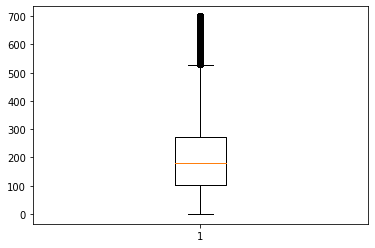

In [ ]:
# 6% outliers. For values > 700, perform stand-alone imputation. 
# Create a new field. Update new field value to median value where duration > 700

bank_data['duration_new'] = bank_data['duration']
duration_median = bank_data['duration'].median()
bank_data['duration_new'][bank_data['duration']>700] = duration_median

# percentile distribution of new variable
dur_new_percent = bank_data['duration_new'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(dur_new_percent)
plt.boxplot(bank_data['duration_new'])

# 18. 'cons.conf.idx' cleaning

0.00   -50.80
0.10   -46.20
0.20   -46.20
0.30   -42.70
0.40   -42.00
0.50   -41.80
0.60   -40.72
0.70   -36.40
0.80   -36.40
0.90   -36.10
0.91   -36.10
0.92   -36.10
0.93   -36.10
0.94   -36.10
0.95   -34.80
0.96   -33.60
0.97   -31.40
0.98   -31.40
0.99   -30.10
1.00   -29.80
Name: cons_conf_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff60871e350>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff6083c4cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff608332710>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff608461ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff608461690>],
 'means': []}

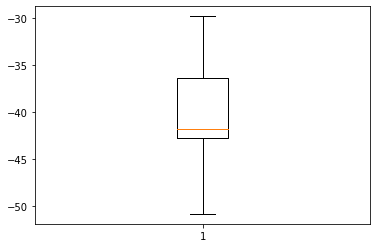

In [ ]:
# 1.09 % outliers. For values = -26.9, perform stand-alone imputation. 
# Create a new field. Update new field value to median value where cons.conf.idx = -26.9

bank_data['cons_conf_new'] = bank_data['cons.conf.idx']
cons_conf_median = bank_data['cons.conf.idx'].median()
bank_data['cons_conf_new'][bank_data['cons.conf.idx']== -26.9] = cons_conf_median

# percentile distribution of new variable
cons_conf_new_percent = bank_data['cons_conf_new'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(cons_conf_new_percent)
plt.boxplot(bank_data['cons_conf_new'])


# Categorical and Discrete variable cleaning 

* FInd out the percentage of data with issues.
* If %age is greater than 50%, then create a flag variable. Do not use the original variable.
* When %age is less than 10%, we do target based imputation. Replace the values with issue with the imputed values.
* When %age is between 10% and 50%, create a flag variable as well as impute the data. We need to be careful when using the imputed data.

Imputation : Do a cross tab with the target variable. See the percentage of 1s and 0s category for each category and issue category. The closest matching percentage distribution is selected to replace the data with issues.

# 2. 'job' cleaning

Target based imputation needs to be done.
Target is y.

In [ ]:
crosstab_job = pd.crosstab(bank_data['job'], bank_data['y'])
crosstab_job
crosstab_job_perc = crosstab_job.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_job_perc, 2)

y,no,yes
job,,
admin.,0.87,0.13
blue-collar,0.93,0.07
entrepreneur,0.91,0.09
housemaid,0.90,0.10
management,0.89,0.11
retired,0.75,0.25
self-employed,0.90,0.10
services,0.92,0.08
student,0.69,0.31


Closest match = technician and management

In [ ]:
# Create new column and replace unknown with imputed value
# replacing with technician

bank_data['job_new'] = bank_data['job']
bank_data['job_new'][bank_data['job']=='unknown'] = 'technician'
print(bank_data['job_new'].value_counts())

admin.           10422
blue-collar       9254
technician        7073
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job_new, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# 3. 'marital' cleaning
Target based imputation to be done.

In [ ]:
crosstab_marital = pd.crosstab(bank_data['marital'], bank_data['y'])
crosstab_marital
crosstab_marital_prec = crosstab_marital.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_marital_prec, 2)

y,no,yes
marital,,
divorced,0.90,0.10
married,0.90,0.10
single,0.86,0.14
unknown,0.85,0.15


Closest match = single

In [ ]:
# Create new column and replace unknown with imputed value

bank_data['marital_new'] = bank_data['marital']
bank_data['marital_new'][bank_data['marital']=='unknown'] = 'single'
print(bank_data['marital_new'].value_counts())

married     24928
single      11648
divorced     4612
Name: marital_new, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 4. 'education' cleaning

Target based imputation to be done

In [ ]:
crosstab_edu = pd.crosstab(bank_data['education'], bank_data['y'])
crosstab_edu_perc = crosstab_edu.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_edu_perc, 2)

y,no,yes
education,,
basic.4y,0.90,0.10
basic.6y,0.92,0.08
basic.9y,0.92,0.08
high.school,0.89,0.11
illiterate,0.78,0.22
professional.course,0.89,0.11
university.degree,0.86,0.14
unknown,0.85,0.15


Closest match = university.degree

In [ ]:
# Create new column and replace unknown with imputed value

bank_data['education_new'] = bank_data['education']
bank_data['education_new'][bank_data['education']=='unknown'] = 'university.degree'
print(bank_data['education_new'].value_counts())

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education_new, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 6. 'housing' cleaning

Target based imputation

In [ ]:
crosstab_house = pd.crosstab(bank_data['housing'], bank_data['y'])
crosstab_house_perc = crosstab_house.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_house_perc, 2)

y,no,yes
housing,,
no,0.89,0.11
unknown,0.89,0.11
yes,0.88,0.12


Closest match = yes, no

In [ ]:
# Create new column and replace unknown with imputed value

bank_data['housing_new'] = bank_data['housing']
bank_data['housing_new'][bank_data['housing']=='unknown']

# Imputing with two values instead of one 
# Replacing 50% of unknown with yes and 50% with no
# 50% of 990 = 495 records

idx = bank_data[bank_data['housing']=='unknown'].head(495).index
bank_data.loc[idx, 'housing_new'] = 'yes'
bank_data['housing_new'][bank_data['housing_new']=='unknown'] = 'no'
print(bank_data['housing_new'].value_counts())

yes    22071
no     19117
Name: housing_new, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# 7. 'loan' cleaning

Target based imputation


In [ ]:
crosstab_loan = pd.crosstab(bank_data['loan'], bank_data['y'])
crosstab_loan_perc = crosstab_house.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_loan_perc, 2)

y,no,yes
housing,,
no,0.89,0.11
unknown,0.89,0.11
yes,0.88,0.12


Closest match = yes, no. Results same as previous variable.

In [ ]:
# Create new column and replace unknown with imputed value

bank_data['loan_new'] = bank_data['loan']
bank_data['loan_new'][bank_data['loan']=='unknown']

# Imputing with two values instead of one 
# Replacing 50% of unknown with yes and 50% with no
# 50% of 990 = 495 records

idx2 = bank_data[bank_data['loan']=='unknown'].head(495).index
bank_data.loc[idx2, 'loan_new'] = 'yes'
bank_data['loan_new'][bank_data['loan_new']=='unknown'] = 'no'
print(bank_data['loan_new'].value_counts())

no     34445
yes     6743
Name: loan_new, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# 5. 'default' cleaning

Categorical variable. 20% unknown. So create a flag variable as missing and available. Keep 'unknown' as it is and treat it as a separate class.

In [ ]:
# Create a flag column for missing (= 0) and available (= 1)

bank_data['default_flag'] = 1
bank_data['default_flag'][bank_data['default']=='unknown'] = 0
print(bank_data['default_flag'].value_counts())

1    32591
0     8597
Name: default_flag, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 13. 'pdays' cleaning

Discrete variable with 96.5% issues. 

Create a flag variable prev_campaign, with values 1 and 0. 1 means the customer was contacted in previous campaign. 0 means not contacted.

In [ ]:
bank_data['prev_campaign'] = 0
bank_data['prev_campaign'][bank_data['pdays'] != 999] = 1
print(bank_data['prev_campaign'].value_counts())

0    39673
1     1515
Name: prev_campaign, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Model Building

Output (Target) variable is categorical type with binary values - yes and no. We need to build a simple model which passes through maximum data points. So Logistic Regression model using only numeric independent variables would be the first logical choice. The logistic regression equation goes though 1 and 0. The output of the model are the logistic equation co-efficients.

#### Logistic Equation
y = {e^(B0 + B1.X1 + B2.x2 +...+ Bk.Xk)}/{1+ e^(B0 + B1.X1 + B2.x2 +...+ Bk.Xk)}

y = output or predicted value

B0 = constant

B1, B2, ... Bk = co-efficients of each of the predictor variables

X1, X2, ...Xk = Predictor (independent) variables


## MODEL 1 : Logistic Regression

### Independent Variables to be used (all numeric) :
1. age
2. campaign
3. pdays
4. previous
5. emp.var.rate
6. duration_new
7. cons.price.idx
8. cons_conf_new
9. euribor3m
10. nr.employed



In [ ]:
# change target variable to discrete : 0 and 1. no = 0, yes = 1
bank_data['y2']= 0
bank_data['y2'][bank_data['y']=='yes']=1
print(bank_data['y2'].value_counts())

0    36548
1     4640
Name: y2, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic1= LogisticRegression()

# fitting logistic regression for target y2 on rest of the variables
logistic1.fit(bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['emp.var.rate']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['euribor3m']+['nr.employed']], bank_data[['y2']])



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Checking the values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [0.00312403]
Coefficients [[-0.00067049 -0.00625341  0.1215186   0.10905778 -0.19365432  0.00469083
   0.32462371  0.04877319 -0.22246372 -0.0060367 ]]


# Model 1 Validation
## Confusion Matrix and accuracy



```
                   Predicted Values
       ----------------------------------------
       |         0          |         1       |
actual | 0  True Positives  | False Negatives |
value  | 1  False Positives | True Negatives  |
       -----------------------------------------
```
Accuracy = (TP + TN) / (TP + FN + FP + TN)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predict1=logistic1.predict(bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['emp.var.rate']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['euribor3m']+['nr.employed']])
predict1

con_mat1 = confusion_matrix(bank_data[['y2']],predict1)
print(con_mat1)

[[36031   517]
 [ 3603  1037]]


In [ ]:
print("col sums", sum(con_mat1))
total1=sum(sum(con_mat1))
print("Total", total1)


col sums [39634  1554]
Total 41188


In [ ]:
accuracy1=(con_mat1[0,0]+con_mat1[1,1])/total1
accuracy1

0.899970865300573

Accuracy of MODEL 1  = 90 %

## Checking Multicollinearity between independent variables (VIF)

#### Multicollinearity
Interdependency among predictor variables is called Multicolliearity. It means that one of the variables can be precited with reasonably good accuracy using the other variables. Ex. Price in dollars, Price in rupees. In other words, both the variables give the same information. Only one of them carries independent information. So it is better to drop the others as they can affect the co-efficients of the equation.

VIF (Variable Inflation Factor) is a measure of multicollinearity. VIF for a variable is calculated by regressing it against other predictor variables using OLS method. If VIF >= 5 then there is dependency among variables.

1. First we find out VIF for each of the predictor variables.
2. If more than one variables has VIF >=5, we drop that variable having the highest VIF the model. IF one variable has VIF >= 5, we drop that variable.
3. Recalculate VIF and repeat step 2 until all variables have VIF < 5.


In [ ]:
import statsmodels.formula.api as sm

bank_data_v1 = bank_data[['age','campaign','prev_campaign','previous','emp.var.rate','duration_new','cons.price.idx','cons_conf_new','euribor3m','nr.employed']]

def vif_cal(input_data, dependent_col):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=bank_data_v1, dependent_col= 'y2')

age  VIF =  1.02
campaign  VIF =  1.05
prev_campaign  VIF =  1.61
previous  VIF =  1.79
emp.var.rate  VIF =  32.72
duration_new  VIF =  1.02
cons.price.idx  VIF =  6.11
cons_conf_new  VIF =  2.36
euribor3m  VIF =  54.49
nr.employed  VIF =  28.14


In [ ]:
# Highest VIF = euribor3m VIF = 54.49
# dropping euribor3m

bank_data_v1 = bank_data[['age','campaign','prev_campaign','previous','emp.var.rate','duration_new','cons.price.idx','cons_conf_new','nr.employed']]

vif_cal(input_data=bank_data_v1, dependent_col= 'y2')

age  VIF =  1.02
campaign  VIF =  1.04
prev_campaign  VIF =  1.61
previous  VIF =  1.79
emp.var.rate  VIF =  24.78
duration_new  VIF =  1.02
cons.price.idx  VIF =  5.54
cons_conf_new  VIF =  1.38
nr.employed  VIF =  13.33


In [ ]:
# Highest VIF = emp.var.rate VIF = 24.78
# dropping emp.var.rate

bank_data_v1 = bank_data[['age','campaign','prev_campaign','previous','duration_new','cons.price.idx','cons_conf_new','nr.employed']]

vif_cal(input_data=bank_data_v1, dependent_col= 'y2')

age  VIF =  1.02
campaign  VIF =  1.04
prev_campaign  VIF =  1.61
previous  VIF =  1.79
duration_new  VIF =  1.02
cons.price.idx  VIF =  1.41
cons_conf_new  VIF =  1.08
nr.employed  VIF =  1.88


All these variable's VIF is less than 5 now. Keep these variables.

## Individual Impact of Variables

Sometimes the model may have a lot of predictor variable but some of them may not have much of an impact on the accuracy of the model. In other words, these redundant variables do not help the model learn much or predict. Since having too many variables will manipulate the accuracy of model and also make it unnecessarily complex, we must drop low impact variables from the model.

P-value is a measure of individual impact of variables. If p-value < 0.05 then keep the variable. If p-value >= 0.05, then drop the variable.

In [ ]:
import statsmodels.api as sm
m1=sm.Logit(bank_data['y2'],bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['nr.employed']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.275112
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275112
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     y2   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41180
Method:                           MLE   Df Model:                            7
Date:                Sun, 02 Oct 2022   Pseudo R-squ.:                  0.2185
Time:                        09:43:23   Log-Likelihood:                -11331.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

P value for all the variables is less than 0.05. All these variables are high impact variables. Keep them.

### Ranking variables as per impact (|z| values highest to lowest)
Higher the value of |z|, greater is the impact.
1. duration_new
2. nr.employed
3. cons.price.idx
4. prev_campaign
5. previous
6. campaign
7. cons_conf_new
8. age

## Recreating Model 1 with these variables

In [ ]:
logistic11= LogisticRegression()

# fitting logistic regression for target y2 on rest of the variables
logistic11.fit(bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['nr.employed']], bank_data[['y2']])

# Checking the values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic11.intercept_)
print("Coefficients", logistic11.coef_)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.00888379]
Coefficients [[ 0.00673692 -0.14021494  0.12516629  0.19990965  0.00421034  0.6428296
   0.02686203 -0.01208238]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## New Model 1 Validation 
## Confusion Matrix and accuracy

In [ ]:
predict11=logistic11.predict(bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['nr.employed']])
predict11

con_mat11 = confusion_matrix(bank_data[['y2']],predict11)
print(con_mat11)

[[35955   593]
 [ 3645   995]]


In [ ]:
print("col sums", sum(con_mat11))
total11=sum(sum(con_mat11))
print("Total", total11)

accuracy11=(con_mat11[0,0]+con_mat11[1,1])/total11
print ('Model Accuracy = ', accuracy11)


col sums [39600  1588]
Total 41188
Model Accuracy =  0.8971059531902495


### Final result
### MODEL 1 accuracy = 89.7 %

# MODEL 2 : Logistic regression

Model 2 is designed to check if imputing the ambiguous records gives better accuracy or not. Here we are keeping the pdays variable and imputing 4110 records to get pdays_new.

### Independent Variables to be used (all numeric) :
1. age
2. campaign
3. pdays_new (updated value for 4110 ambiguous records)
4. previous
5. duration_new
6. cons.price.idx
7. cons_conf_new
8. nr.employed

pdays_new will be created from pdays after target based imputation for the 4110 ambiguous records



In [ ]:
bank_data[(bank_data['poutcome']=='failure') & (bank_data['pdays']==999)]

# First change the values of these 4110 records to -1 to make it into another category
# Second, impute based on target, and change these -1 values to some other close value (except 999)

bank_data['pdays_new'] = bank_data['pdays']
bank_data['pdays_new'][(bank_data['poutcome']=='failure') & (bank_data['pdays']==999)] = -1

# Imputation based on target y
crosstab_pdays = pd.crosstab(bank_data['pdays_new'], bank_data['y'])
crosstab_pdays_perc = crosstab_pdays.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_pdays_perc, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


y,no,yes
pdays_new,,
-1,0.87,0.13
0,0.33,0.67
1,0.69,0.31
2,0.39,0.61
3,0.32,0.68
4,0.47,0.53
5,0.37,0.63
6,0.30,0.70
7,0.33,0.67


In [ ]:
# Closest match is 17
# Create new column and replace -1 with imputed value 17

bank_data['pdays_new'][bank_data['pdays']==-1] = 17
print(bank_data['pdays_new'].value_counts())

 999    35563
-1       4110
 3        439
 6        412
 4        118
 9         64
 2         61
 7         60
 12        58
 10        52
 5         46
 13        36
 11        28
 1         26
 15        24
 14        20
 8         18
 0         15
 16        11
 17         8
 18         7
 22         3
 19         3
 21         2
 25         1
 26         1
 27         1
 20         1
Name: pdays_new, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Logistic Regression build

In [ ]:
logistic2= LogisticRegression()

# fitting logistic regression for target y2 on rest of the variables
logistic2.fit(bank_data[['age']+['campaign']+['pdays_new']+['previous']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['nr.employed']], bank_data[['y2']])

# Checking the values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic2.intercept_)
print("Coefficients", logistic2.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.00897576]
Coefficients [[ 2.84019809e-03 -5.15437970e-02 -3.36271175e-04  7.08878689e-02
   4.40566997e-03  6.12214301e-01  2.79521973e-02 -1.14738573e-02]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Model 2 Validation
## Confusion Matrix and accuracy

In [ ]:
predict2=logistic2.predict(bank_data[['age']+['campaign']+['pdays_new']+['previous']+['duration_new']+['cons.price.idx']+['cons_conf_new']+['nr.employed']])

con_mat2 = confusion_matrix(bank_data[['y2']],predict2)
print(con_mat2)

[[36011   537]
 [ 3686   954]]


In [ ]:
print("col sums", sum(con_mat2))
total2=sum(sum(con_mat2))
print("Total", total2)

accuracy2=(con_mat2[0,0]+con_mat2[1,1])/total2
print ('Model Accuracy = ', accuracy2)


col sums [39697  1491]
Total 41188
Model Accuracy =  0.8974701369330873


MODEL 2 accuracy = 89.75 %

# MODEL 3 : Logistic Regression

Model 3 is designed to check the impact of further data cleaning of the highest impact (|z|) variable on the model.

outlier % 7.193842866854424
0.00      0.0
0.10     59.0
0.20     89.0
0.30    116.0
0.40    146.0
0.50    180.0
0.60    190.0
0.70    237.0
0.80    301.0
0.90    404.0
0.91    419.0
0.92    435.0
0.93    454.0
0.94    473.0
0.95    494.0
0.96    518.0
0.97    545.0
0.98    576.0
0.99    608.0
1.00    644.0
Name: duration_new2, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5fa40d2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5fa40dd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5fa408cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5fa415850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5fa415d90>],
 'means': []}

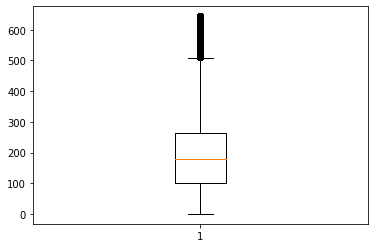

In [ ]:
# duration cleaning 2
# threshold = 644.5 as found from the box plot logic during data exploration

out = bank_data['duration'][bank_data['duration']>644.5].count()
out_perc = 2963*100/41188
print('outlier %', out_perc)
# 7.2% outliers. For values > 644.50, perform stand-alone imputation. 
# Create a new field. Update new field value to median value where duration > 644.50

bank_data['duration_new2'] = bank_data['duration']
duration_median = bank_data['duration'].median()
bank_data['duration_new2'][bank_data['duration']>644.5] = duration_median

# percentile distribution of new variable
dur_new_percent2 = bank_data['duration_new2'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(dur_new_percent2)
plt.boxplot(bank_data['duration_new2'])

In [ ]:
logistic2= LogisticRegression()

# fitting logistic regression for target y2 on rest of the variables
logistic2.fit(bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['duration_new2']+['cons.price.idx']+['cons_conf_new']+['nr.employed']], bank_data[['y2']])

# Checking the values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic2.intercept_)
print("Coefficients", logistic2.coef_)

predict2=logistic2.predict(bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['duration_new2']+['cons.price.idx']+['cons_conf_new']+['nr.employed']])

# Confusion Matrix
con_mat2 = confusion_matrix(bank_data[['y2']],predict2)
print(con_mat2)

print("col sums", sum(con_mat2))
total2=sum(sum(con_mat2))
print("Total", total2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.0093668]
Coefficients [[ 0.00309143 -0.04541667  0.14625185  0.19551629  0.00414491  0.6146552
   0.02596082 -0.01157623]]
[[36010   538]
 [ 3711   929]]
col sums [39721  1467]
Total 41188


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy2=(con_mat2[0,0]+con_mat2[1,1])/total2
print ('Model Accuracy = ', accuracy2)

# Model accuracy = 89.7 % which is not much different from Model 1

Model Accuracy =  0.8968388851121686


### Logistic Regression (simple) output
#### From Logistic Regression Modelling it is found that the best fit model is "MODEL 1" with an accuracy of "89.7%".


## Detailed Model Validation of Model 1

Accuracy is a measure of overall correct prediction which includes both 0s and 1s prediction. Sometimes we are interested more in the accuracy of one of the classes. So we have other parameters that can calculate class-wise performance of the model.

1. Sensitivity - Also known as Recall of Class 0. Basically it is number of times 0 was correctly predicted as 0 in percentage. 

Sensitivity = True Positives/(True positives + False Negatives)

2. Specificity - Recall of Class 1. It is the number of times 1 was correctly predicted as 1 in percentage.

Specificity = True Negatives/(True Negatives + False Positives)

3. F1 score - The harmonic mean of sensitivity and specificity.

F1 score = 2/{(1/Sensitivity)+(1/Specificity)}


In [ ]:
# Confusion Matrix for Model 1 = con_mat11
print('Confusion Matrix')
print(con_mat11)

total1=sum(sum(con_mat11))

##### From Confusion Matrix, calculate

# ACCURACY
accuracy1=(con_mat11[0,0]+con_mat11[1,1])/total1
print ('Accuracy : ', accuracy1)

# Sensitivity (Recall of Class 0)
sensitivity1 = con_mat11[0,0]/(con_mat11[0,0]+con_mat11[0,1])
print('Sensitivity / Recall(0) : ', sensitivity1 )

# Precision of Class 0
precision1_0 = con_mat11[0,0]/(con_mat11[0,0]+con_mat11[1,0])
print('Precision Class 0 : ', precision1_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision1_0)+(1/sensitivity1))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity1 = con_mat11[1,1]/(con_mat11[1,0]+con_mat11[1,1])
print('Specificity / Recall(1) : ', specificity1)

# Precision of Class 1
precision1_1 = con_mat11[1,1]/(con_mat11[0,1]+con_mat11[1,1])
print('Precision Class 1 : ', precision1_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision1_1)+(1/specificity1))
print('F1 Score of CLass 1 : ', F1_class1 )


Confusion Matrix
[[35955   593]
 [ 3645   995]]
Accuracy :  0.8971059531902495
Sensitivity / Recall(0) :  0.9837747619568786
Precision Class 0 :  0.9079545454545455
F1 Score of CLass 0 :  0.9443452224615222
Specificity / Recall(1) :  0.21443965517241378
Precision Class 1 :  0.6265743073047859
F1 Score of CLass 1 :  0.31952472703917795


In [ ]:
#Frequency count on target column
freq=bank_data['y2'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    36548
1     4640
Name: y2, dtype: int64
0    88.734583
1    11.265417
Name: y2, dtype: float64


In full dataset, percentage of Class 1 values = 4640/41188 = 11.26%
Class 1  = Customers who bought (Buy = Yes). This Class is more important.
But Recall, Precision and F1 Score of Class 1 are quite low.

### We have Class Imbalance

### Class Imbalance
Sometimes, in a real world dataset, it may happen that the frequency of one class in target variable is much higher than the other class. This is called class imbalance. The issue with class imbalance is that, if we build the model on imbalanced data, then the model may not get enough data points of the minority class to correctly learn to predict it. Predictions will have low accuracy in minority class.

3 ways to handle class imbalance

1. Threshold variation - change how the 0s and 1s are predicted
2. Sampling - Increase the count of minority class by duplicating records or reduce records of majority class.
3. SMOTE - Create new synthetic datapoints through interpolation.

## Handling Class Imbalance by varying Threshold

Actual predictions made by the logistic regression model equation are continous. They are converted to discrete 0 and 1 by using a default threshold value of 0.5.

If value < 0.5, then predict as 0, if >= 0.5, then predict as 1.

However, if we reduce the threshold value from 0.5, then less number of values will be predicted as 0 and more number of values will be predicted 1. Sensitivity decreases but Specificity increases. When threshold is increased then vice-versa. when one of the classes is more important, we can vary the threshold to improve predictions for that class.


First we need the raw predicted values from the model without threshold being applied on them.

In [ ]:
##    Generates the y~X style formula for statsmodels 

## Creating new columns with proper name format
## . in column name is not accepted in some functions
bank_data['cons_price_idx'] = bank_data['cons.price.idx']
bank_data['nr_employed'] = bank_data['nr.employed']
bank_data['emp_var_rate'] = bank_data['emp.var.rate'] # Used later

features = ['age','campaign','prev_campaign','previous','duration_new','cons_price_idx','cons_conf_new','nr_employed']
df_columns = list(features)
model_formula = 'y2' + ' ~ ' + ' + '.join(df_columns)
print(model_formula)

y2 ~ age + campaign + prev_campaign + previous + duration_new + cons_price_idx + cons_conf_new + nr_employed


### Build the continuous value prediction model

In [ ]:
import statsmodels.formula.api as sm

prediction_model=sm.logit(model_formula, data=bank_data)
results=prediction_model.fit()
print(results.summary())

predictions = results.predict()
print(predictions[0:10])
len(predictions)
# We got the raw predicted values of the logistic regression model for all the records

Optimization terminated successfully.
         Current function value: 0.266827
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     y2   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41179
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Oct 2022   Pseudo R-squ.:                  0.2420
Time:                        09:43:27   Log-Likelihood:                -10990.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         69.2399      2.674     25.897      0.000      64.000      74.480
age              

41188

### ROC Curve

It is a graph plotted as Sensitivity vs (1 - Specificity) for every possible value of the threshold. It helps us understand the below points

1. How specificity varies with sensitivity
2. The margin of mistakes or errors we are willing to compromise with to get a particular value of sensitivity or specificity.
3. Optimal threshold value

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = bank_data["y2"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0.00000000e+00 0.00000000e+00 2.73612783e-05 ... 9.94637189e-01
 9.94691912e-01 1.00000000e+00]
true_positive_rate [0.00000000e+00 2.15517241e-04 2.15517241e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
thresholds [1.9699017  0.9699017  0.96723575 ... 0.0100702  0.01001782 0.00494967]


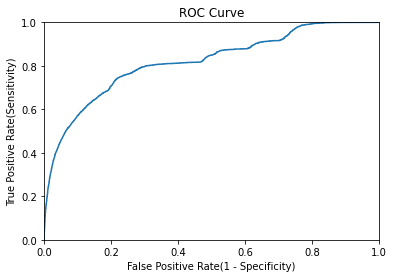

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.show()

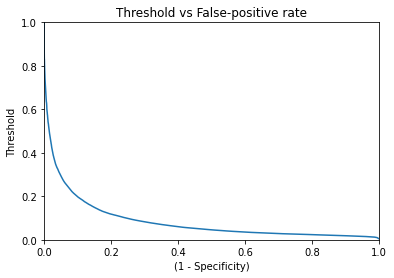

In [ ]:
plt.title('Threshold vs False-positive rate')
plt.plot(false_positive_rate, thresholds)

# X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# labels
plt.ylabel('Threshold')
plt.xlabel('(1 - Specificity)')
plt.show()

### AUC
Area under the ROC Curve : It is a measure of the overall fit of the model. A logitic regression model having higher AUC will predict more accurately. Hence, it is used to compare models to find out which one has better fit.

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8185543668600197

### Threshold

In [ ]:
### Sensitivity vs Specificity with Different Thresholds
### Converting predicted values into classes using new threshold
threshold=0.1
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

#Change in Confusion Matrix, Accuracy and Sensitivity-Specificity
#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(bank_data["y2"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
### from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[27583  8965]
 [ 1114  3526]]
Accuracy :  0.7552928037292416
Sensitivity :  0.7547061398708548
Specificity :  0.7599137931034483


false_positive_rate [0.         0.24529386 1.        ]
true_positive_rate [0.         0.75991379 1.        ]
thresholds [2 1 0]


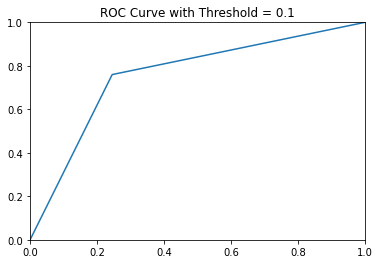

ROC AUC:  0.7573099664871515


In [ ]:
actual = bank_data["y2"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_class1)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

#Drawing ROC Curve
plt.title('ROC Curve with Threshold = 0.1')
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])
plt.show()

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

We are using only one value of threshold i.e. 0.1. So we have one data point only. Hence ROC looks like this.

Specificity increased to 76% when threshold is reduced to 0.1
Corresponding sensitivity = 75.5%

# MODEL 4 - Decision Tree
To find out the best fit model along with customer segmentation.

### Decision Tree Theory

Logic - By rearranging the data we can get the predicted values.

In decision tree, the dataset is divided into 2 subsets so that one of the subsets has class 1 dominance (count wise), and the other subset has class 0 dominance. The criteria of split is automatically chosen based on entropy calculation. This split is carried on with each subsequent subsets, till we have pure subset (only 1s or only 0s), or until all the criteria have been exhausted.

* Node - Every dataset and subset in a decision tree is called a node.
* Parent node - The dataset that is split into 2 subsets.
* Child node - The subsets obtained after the split. Child nodes are subsets and are also known as segments.
* Binary tree - A data structure in which each parent node is split into exactly 2 child nodes is call a binary tree. Decision tree is a binary tree.
* Leaf node - A node that cannot be further split into child nodes.
* Entropy - The measure of randomness or impurity in a dataset. 

Entropy = - P0 log2 P0 - P1 log2 P1
, where P0 is the ratio of class 0 in the dataset and P1 is the ratio of class 1.
* Information gain - The change in entropy before and after the split is called information gain. 

Information gain = Entropy of parent node - Weighted entropy of the child nodes

Weighted entropy = (Entropy of child1 * %age records of class 1) + (Entropy of child2 * %age of records of class 2)
* Splitting criteria - A predictor variable and its corresponding value range is so chosen that it gives maximum information gain after splitting. At every split IG is calculated again.



### Decision Tree processing steps

1. On the full dataset, calculate IG for every variable for every possible value.
2. Pick the variable with highest IG and split.
3. Check if the child nodes have pure class.
4. If pure class, then stop splitting.
5. If impure class, then implement steps 1, 2, 3 on that child node.
6. Continue the process till we have pure class in every leaf node or we run out of splitting criteria.

### Decision Tree implementation on real world data and stopping condition

In real world data set, it is not easy to get fully pure subsets. So to make the segments fully pure, the decision tree will keep on iterating. The depth of tree and number of leaf nodes will keep on increasing. 

#### Overfitting
The output of the decision tree is a set of rules which make the prediction. Every leaf node is a rule. With increase in number of leaf nodes, number of rules increases. It may be possible that, if a dataset has 10000 records, the decision tree will fit every singe record into individual leaf nodes. So we will have 10000 leaf nodes and 10000 rules. Such a DTree will have 100% accuracy.

The problem with such a scenario is that the tree is basically customized to work on that dataset only. It is like the DTree has memorized that dataset. So it will fail on other datasets and will have low accuracy. This problem is called Overfitting.

#### Stopping criteria
We have to limit the size of the Dtree so that it can work well with all datasets. So we define two parameters to check the tree growth. We expect to get leaf nodes with purity or class dominance. So, maximum possible accuracy with limited leaf nodes.
* max_leaf_nodes = maximum number of leaf nodes that a tree can have. Splitting will cease once this number is achieved.
* max_depth = The maximum number of levels to which the tree can grow. If max_depth is d, then maximum number of leaf nodes will be 2^d.

#### Underfitting
If the size of the tree is too small, the accuracy of the prediction will be low. Accuracy can still be improved by increasing the number of leaf nodes. Such a scenario is called Underfitting.

#### Solving the issue of Underfitting and Overfitting - Train and Test data

We take the full dataset and split it into two sets record-wise in the 80%-20% ratio, lets say. The 80% set is called train data and it is used to build the model. We may implement sampling and SMOTE techniques on this set to handle class imbalance before building the model. The 20% set is called test data. It is a reflection of the real world data distribution. It is used to validate the model. The accuracy we get on test dataset is the accuracy of the model. We can expect to get similar accuracy on other real world datasets. Train and test datasets should have mutually exclusive records.

#### Building best model
Achieve maximum possible accuracy on train data by trying different values of hyper parameters. Attain matcing accuracy on test data. The acceptable difference between them can be maximum 1%-2%.

### Variables used
1. age
2. campaign
3. prev_campaign
4. previous
5. emp.var.rate
6. duration_new
7. cons.price.idx
8. cons_conf_new
9. euribor3m
10. nr.employed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

features = ['age','campaign','prev_campaign','previous','emp_var_rate','duration_new','cons_price_idx','cons_conf_new','euribor3m','nr_employed']

X = bank_data[features]
y = bank_data['y']

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state=300)

# Building the best model with high train accuracy
dtree_model1 = tree.DecisionTreeClassifier(max_leaf_nodes = 45)
dtree_model1.fit(X_train,y_train)

train_acc= dtree_model1.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= dtree_model1.score(X_test,y_test)
print("test_accuracy", test_acc)

train_accuracy 0.9155083459787557
test_accuracy 0.915877640203933


In [ ]:
# Plotting the tree

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(15,15))
# plot_tree(dtree_model1, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = features)
# print( export_text(dtree_model1, feature_names = features))

Model 4 : Decision Tree (max leaf nodes = 45)
Train accuracy = 91.55%, Test accuracy = 91.6%

### Model Validation using Confusion Matrix

In [ ]:
predict1 = dtree_model1.predict(X_train)
predict2 = dtree_model1.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

# Therefore we can conclude that, dtree_model1.score() is same as the accuracy from confusion matrix


Train Accuracy 0.9155083459787557
Test Accuracy 0.915877640203933


Since, the test data is close to real world data distribution and model was not built on test data, we can condiser test accuracy as the accuracy of the model when it will be run on any other real world dataset as well.
### Final accuracy  = 91.6%

## Model Validation Parameters

In [ ]:
##### From Confusion Matrix, we calculate

# Sensitivity (Recall of Class 0)
sensitivity4 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity / Recall(0) : ', sensitivity4 )

# Precision of Class 0
precision4_0 = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Precision Class 0 : ', precision4_0 )

# F1 Score of Class 0
F1_class0_m4 = 2/((1/precision4_0)+(1/sensitivity4))
print('F1 Score of CLass 0 : ', F1_class0_m4 )

# Specificity (Recall of Class 1)
specificity4 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity / Recall(1) : ', specificity4)

# Precision of Class 1
precision4_1 = cm2[1,1]/(cm2[0,1]+cm2[1,1])
print('Precision Class 1 : ', precision4_1 )

# F1 Score of Class 1
F1_class1_m4 = 2/((1/precision4_1)+(1/specificity4))
print('F1 Score of CLass 1 : ', F1_class1_m4 )


Sensitivity / Recall(0) :  0.9697630073549441
Precision Class 0 :  0.9379528388881571
F1 Score of CLass 0 :  0.9535927141230832
Specificity / Recall(1) :  0.47433035714285715
Precision Class 1 :  0.6568778979907264
F1 Score of CLass 1 :  0.5508749189889824


## Handling Class Imbalance

In [ ]:
print("Actual Data :", bank_data.shape)

# Frequency count on target column
freq=bank_data['y'].value_counts()
print(freq)
print((freq/freq.sum())*100)

# Train dataset
bank_train_ds = X_train
bank_train_ds['y'] = y_train

# Classwise data
buy_no_class0 = bank_train_ds[bank_train_ds['y'] == 'no']
buy_yes_class1 = bank_train_ds[bank_train_ds['y'] == 'yes']

print("Class0 Actual :", buy_no_class0.shape)
print("Class1 Actual  :", buy_yes_class1.shape)

X_train = X_train.drop(columns = ['y'])

Actual Data : (41188, 36)
no     36548
yes     4640
Name: y, dtype: int64
no     88.734583
yes    11.265417
Name: y, dtype: float64
Class0 Actual : (29206, 11)
Class1 Actual  : (3744, 11)


The percentage of 1s in the distribution is only 11% wile 0s are 89%. The data is imbalanced. Building a model on this data will not predict the 1s accurately as there aren't enough datapoints to learn their pattern. So we have to balance the ratio and bring it close to 1:1 to build a proper model.

## Undersampling and Oversampling

Undersampling means we reduce the number of records of the mojority class by a certain percentage. Here we will be reducing the records of class 0 by 20% and keeping 80%.

Oversampling means we increase the number of records of minority class to a certain percentage by duplicating records. Here we will increase the class 1 records to 400%. 

In [ ]:
## Undersampling of class-0
## Consider 80% of class-0
buy_no_class0_under = buy_no_class0.sample(int(0.8*len(buy_no_class0)))
print("Class0 Undersample :", buy_no_class0_under.shape)

## Oversampling of Class-1 
# Lets increase Class-0 size by 4 times
buy_yes_class1_over = buy_yes_class1.sample(4*len(buy_yes_class1),replace=True)
print("Class1 Oversample :", buy_yes_class1_over.shape)

#Concatenate to create the final balanced data
sampled_data=pd.concat([buy_no_class0_under,buy_yes_class1_over])
print("Sampled Data :", sampled_data.shape)

#Frequency count on target column in the sampled data
freq=sampled_data['y'].value_counts()
print(freq)


Class0 Undersample : (23364, 11)
Class1 Oversample : (14976, 11)
Sampled Data : (38340, 11)
no     23364
yes    14976
Name: y, dtype: int64


## Using SMOTE to further reduce Class Imbalance

SMOTE stands for Synthetic Minority Oversampling Technique. In this method, we pick a data point and five data points closest to it. Out of the five we pick one randomly. Then we extrapolate the two points, and a point is picked randomly between the two data points on the extrapolated line. This new data point is a smote point.

Smote can be implemented only on numerical variables.

Sampling strategy defines the percentage of the smote class (class 1) in comparison the other class. If it is not mentioned, default is 100%, which means we will have exact same number of records for class 1 as we have in class 0.


random_state - If we do not define this parameter, everytime the sample obtained from smote will have different set of datapoints. But if we need same set of datapoints each time we run the code, the  we use random_state = some number. Every number will create a unique dataset associated with that number as seed. On repeated executions, same dataset will be generated ensuring consistency in results.


In [ ]:
features = ['age','campaign','prev_campaign','previous','emp_var_rate','duration_new','cons_price_idx','cons_conf_new','euribor3m','nr_employed']
X_train=sampled_data[features]
print(X_train.shape)

y_train=sampled_data['y']
print(y_train.shape)

from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.9, random_state = 300)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(X_train_smote.shape)
print(y_train_smote.shape)

import collections
print("After SMOTE", collections.Counter(y_train_smote))


(38340, 10)
(38340,)
(44391, 10)
(44391,)
After SMOTE Counter({'no': 23364, 'yes': 21027})


In [ ]:
# previously created test dataset from original data
print(X_test.shape)
print(y_test.shape)


(8238, 10)
(8238,)


# MODEL 5 : Decision Tree with Balanced Data

In [ ]:
# Building the model with max train accuracy and matching test_accuracy

dtree_model2 = tree.DecisionTreeClassifier(max_leaf_nodes = 30)#30
dtree_model2.fit(X_train_smote,y_train_smote)

train_acc= dtree_model2.score(X_train_smote,y_train_smote)
print("train_accuracy", train_acc)

test_acc= dtree_model2.score(X_test,y_test)
print("test_accuracy", test_acc)

train_accuracy 0.8824311234259197
test_accuracy 0.8714493809176985


### K - Fold Cross Validation
#### ( 10-Fold Cross Validation )

In [ ]:
tree_KF = tree.DecisionTreeClassifier()

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(tree_KF,X, y,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.94998786 0.94586065 0.93493566 0.91866958 0.76911872 0.93226511
 0.87739743 0.85506191 0.83244293 0.59664886]
Avg K-Fold Accuracy 0.8612388708859464


## Confusion Matrix and Model Validation Parameters

In [ ]:
# predicting for test data once again
predict5 = dtree_model2.predict(X_test)

# Model accuracy = Test data accuracy
# Confusion Matrix for Model 5
cm5 = confusion_matrix(y_test,predict5)
print('Confusion matrix : \n', cm5)

# Overall Accuracy
total5 = sum(sum(cm5))
accuracy5 = (cm5[0,0]+cm5[1,1])/total5
print("Overall Accuracy", accuracy5)

print('\n MODEL VALIDATION PARAMETERS')

# Sensitivity (Recall of Class 0)
sensitivity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity / Recall(0) : ', sensitivity5 )

# Precision of Class 0
precision5_0 = cm5[0,0]/(cm5[0,0]+cm5[1,0])
print('Precision Class 0 : ', precision5_0 )

# F1 Score of Class 0
F1_class0_m5 = 2/((1/precision5_0)+(1/sensitivity5))
print('F1 Score of CLass 0 : ', F1_class0_m5 )

# Specificity (Recall of Class 1)
specificity5 = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity / Recall(1) : ', specificity5)

# Precision of Class 1
precision5_1 = cm5[1,1]/(cm5[0,1]+cm5[1,1])
print('Precision Class 1 : ', precision5_1 )

# F1 Score of Class 1
F1_class1_m5 = 2/((1/precision5_1)+(1/specificity5))
print('F1 Score of CLass 1 : ', F1_class1_m5 )

Confusion matrix : 
 [[6405  937]
 [ 122  774]]
Overall Accuracy 0.8714493809176985

 MODEL VALIDATION PARAMETERS
Sensitivity / Recall(0) :  0.8723780986107328
Precision Class 0 :  0.9813084112149533
F1 Score of CLass 0 :  0.9236426562837983
Specificity / Recall(1) :  0.8638392857142857
Precision Class 1 :  0.4523670368205728
F1 Score of CLass 1 :  0.5937859608745685


### Findings
After balancing the data, the Specificity increased from 47.4% to 86.4%. F1 score of class 1 increased from 55.1% to 59.4%.

Since we are interested with accuracy of Class 1, we can see that this accuracy has almost doubled after balancing the data.

# Feature Engineering

Convert binary categorical variables to 0 and 1.

Convert the other categorical variables to numeric using Label Encoding or One-Hot Encoding.

To use all the variables in our model we need to convert the string type variables to numeric.

#### * Binary categorical variables
These categorical variables have two values only like - Success and Failure, Buy and Not buy, Telephone and Mobile.

Convert one category to 0 and the other to 1

#### * Categorical data which can be ordered or compared on greater than or lesser than basis

variables like age_bucket, income_bucket, size (small, medium, large), etc.

Arrange the classes in increasing order and label them as 0, 1, 2, 3...

#### * Multiclass categorical data which cannot be ordered
We use One-Hot encoding

Every class in the variable is converted into a separate column. The columns will have 1 where the same value was present in the original column. In the rest of the records they will have 0s.






In [ ]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'duration_new',
       'cons_conf_new', 'job_new', 'marital_new', 'education_new',
       'housing_new', 'loan_new', 'default_flag', 'prev_campaign', 'y2',
       'pdays_new', 'duration_new2', 'cons_price_idx', 'nr_employed',
       'emp_var_rate'],
      dtype='object')

In [ ]:
# Adding a prefix to 'default' column values 
# so that the column name created in one-hot encoding remains unique
bank_data['default2'] = bank_data['default'].apply(lambda x : 'default_'+ x)
bank_data['default2'].value_counts()

default_no         32588
default_unknown     8597
default_yes            3
Name: default2, dtype: int64

### Converting binary-type values to numerical values 0 and 1 

In [ ]:
# Converting housing_new to numerical
bank_data['housing_new2'] = 0
bank_data['housing_new2'][bank_data['housing_new']=='yes'] = 1
print(bank_data['housing_new2'].value_counts())

# Converting loan_new to numerical
bank_data['loan_new2'] = 0
bank_data['loan_new2'][bank_data['loan_new']=='yes'] = 1
print(bank_data['loan_new2'].value_counts())

# Converting contact to numerical
bank_data['contact2'] = 0
bank_data['contact2'][bank_data['contact']=='telephone'] = 1
print(bank_data['contact2'].value_counts())

1    22071
0    19117
Name: housing_new2, dtype: int64
0    34445
1     6743
Name: loan_new2, dtype: int64
0    26144
1    15044
Name: contact2, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
# Creating new variable num_loans
bank_data['num_loans'] = 0
bank_data['num_loans'] = bank_data['housing_new2'] + bank_data['loan_new2']
bank_data['num_loans'].value_counts()

1    20442
0    16560
2     4186
Name: num_loans, dtype: int64

In [ ]:
# get general columns into a dataset
bank_data_with_dummies = bank_data[['age', 'campaign', 'prev_campaign', 'previous', 'emp_var_rate', 'duration_new', 'cons_price_idx', 
                                    'cons_conf_new', 'euribor3m', 'nr_employed', 'default_flag', 'housing_new2', 'loan_new2', 'contact2', 'num_loans', 'y2']]
bank_data_with_dummies

onehot_cols=['job_new', 'marital_new', 'education_new', 'default2', 'month', 'day_of_week', 'poutcome']
# for col in categorical_cols:
#  print(bank_data[col].value_counts())

# get dummy variables
for col in onehot_cols:
 one_hot_data = pd.get_dummies(bank_data[col])
 bank_data_with_dummies = pd.concat([bank_data_with_dummies, one_hot_data],axis=1)
print("bank_data_with_dummies \n", bank_data_with_dummies)

bank_data_with_dummies 
        age  campaign  prev_campaign  previous  emp_var_rate  duration_new  \
0       56         1              0         0           1.1           261   
1       57         1              0         0           1.1           149   
2       37         1              0         0           1.1           226   
3       40         1              0         0           1.1           151   
4       56         1              0         0           1.1           307   
...    ...       ...            ...       ...           ...           ...   
41183   73         1              0         0          -1.1           334   
41184   46         1              0         0          -1.1           383   
41185   56         2              0         0          -1.1           189   
41186   44         1              0         0          -1.1           442   
41187   74         3              0         1          -1.1           239   

       cons_price_idx  cons_conf_new  euribor3m  n

In [ ]:
bank_data_with_dummies.columns

Index(['age', 'campaign', 'prev_campaign', 'previous', 'emp_var_rate',
       'duration_new', 'cons_price_idx', 'cons_conf_new', 'euribor3m',
       'nr_employed', 'default_flag', 'housing_new2', 'loan_new2', 'contact2',
       'num_loans', 'y2', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'divorced', 'married', 'single', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'default_no',
       'default_unknown', 'default_yes', 'apr', 'aug', 'dec', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed',
       'failure', 'nonexistent', 'success'],
      dtype='object')

In [ ]:
bank_data_with_dummies.rename(columns = {'admin.':'admin', 'blue-collar':'blue_collar', 'self-employed':'self_employed',
                                         'basic.4y':'basic4y', 'basic.6y':'basic6y', 'basic.9y':'basic9y', 'high.school':'high_school',
                                         'professional.course':'pro_course', 'university.degree':'univ_degree' }, inplace = True)

## Creating Train and Test datasets for futher use

In [ ]:
bank_data_org = bank_data_with_dummies
features = bank_data_org.columns
features = features.drop('y2')

X = bank_data_org[features]
y = bank_data_org['y2']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state=300)

In [ ]:
bank_data_train = X_train
bank_data_train['y2'] = y_train
bank_data_test = X_test
bank_data_test['y2'] = y_test

X_train = X_train.drop(columns=['y2'])
X_test = X_test.drop(columns=['y2'])


## Oversampling of minority class (Class 1)

In [ ]:
# Classwise data
bank_data_train_class0 = bank_data_train[bank_data_train['y2'] == 0]
bank_data_train_class1 = bank_data_train[bank_data_train['y2'] == 1]
print("Class 0 data :", bank_data_train_class0.shape)
print("Class 1 data :", bank_data_train_class1.shape)

## Oversampling of Class-1 
# Increase count by 4 times
bank_data_class1_over = bank_data_train_class1.sample(4*len(bank_data_train_class1), replace=True)
print("Class 1 Oversample :", bank_data_class1_over.shape)

# Concatenate with Class 0 data
bank_data_sampled=pd.concat([bank_data_train_class0,bank_data_class1_over])
print("Sampled Data :", bank_data_sampled.shape)
print(bank_data_sampled['y2'].value_counts())


Class 0 data : (29206, 58)
Class 1 data : (3744, 58)
Class 1 Oversample : (14976, 58)
Sampled Data : (44182, 58)
0    29206
1    14976
Name: y2, dtype: int64


## Using SMOTE to furter handle Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.9, random_state = 300)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

import collections
print("After SMOTE", collections.Counter(y_smote))

balanced_bank_data=X_smote
balanced_bank_data['y2']=y_smote

print('Balanced Dataset : \n',balanced_bank_data.shape)
print(balanced_bank_data.columns.values)
# balanced_bank_data is train data X,y

After SMOTE Counter({0: 29206, 1: 26285})
Balanced Dataset : 
 (55491, 58)
['age' 'campaign' 'prev_campaign' 'previous' 'emp_var_rate' 'duration_new'
 'cons_price_idx' 'cons_conf_new' 'euribor3m' 'nr_employed' 'default_flag'
 'housing_new2' 'loan_new2' 'contact2' 'num_loans' 'admin' 'blue_collar'
 'entrepreneur' 'housemaid' 'management' 'retired' 'self_employed'
 'services' 'student' 'technician' 'unemployed' 'divorced' 'married'
 'single' 'basic4y' 'basic6y' 'basic9y' 'high_school' 'illiterate'
 'pro_course' 'univ_degree' 'default_no' 'default_unknown' 'default_yes'
 'apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep' 'fri' 'mon'
 'thu' 'tue' 'wed' 'failure' 'nonexistent' 'success' 'y2']


In [ ]:
X_smote = X_smote.drop(columns = ['y2'], axis=1)
X_smote.shape

(55491, 57)

# MODEL BUILDING WITH ALL VARIABLES

# MODEL 6 : Logistic Regression

### Step 1 : All independent variables included

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic6= LogisticRegression()

# fitting logistic regression for independent variables
logistic6.fit(balanced_bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['emp_var_rate']+['duration_new']+
['cons_price_idx']+['cons_conf_new']+['euribor3m']+['nr_employed']+['default_flag']+
['housing_new2']+['loan_new2']+['contact2']+['num_loans']+['admin']+['blue_collar']+
['entrepreneur']+['housemaid']+['management']+['retired']+['self_employed']+['services']+
['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+['basic4y']+
['basic6y']+['basic9y']+['high_school']+['illiterate']+['pro_course']+['univ_degree']+
['default_no']+['default_unknown']+['default_yes']+['apr']+['aug']+['dec']+['jul']+['jun']+
['mar']+['may']+['nov']+['oct']+['sep']+['fri']+['mon']+['thu']+['tue']+['wed']+['failure']+
['nonexistent']+['success']], balanced_bank_data[['y2']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic6.intercept_)
print("Coefficients", logistic6.coef_)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.004138]
Coefficients [[-4.48427638e-03 -4.35425254e-01  1.00039309e-01 -2.18563860e-01
  -2.36654633e-02  4.03280578e-03  6.24880838e-01  2.28524126e-02
  -4.18877996e-02 -1.05294131e-02 -6.43225997e-02 -6.96220356e-01
  -4.29125475e-01 -6.07034923e-01 -8.64531061e-01 -5.05282633e-01
  -6.45761443e-01 -1.23241985e-01 -8.70444903e-02 -2.27412933e-01
  -2.09271209e-02 -1.19495446e-01 -3.30378566e-01 -6.16813168e-02
  -4.21178989e-01 -8.99281518e-02 -3.39788440e-01 -6.95747058e-01
  -3.84466800e-01 -3.08830827e-01 -1.84499940e-01 -4.71386890e-01
  -5.95105408e-01 -1.20454549e-03 -3.67239173e-01 -4.65050811e-01
  -6.40642022e-02 -4.93117210e-01 -2.58397502e-04 -1.62773344e-01
  -3.71063445e-04 -8.29081085e-03  1.24837305e-01 -3.80160779e-02
   4.91386722e-02 -1.01707730e+00 -1.42203989e-01  5.17769136e-02
  -1.78916915e-02 -5.37242421e-01 -6.33688704e-01 -5.03782140e-01
  -5.03597476e-01 -4.82634365e-01 -5.50508366e-01 -3.58471907e-01
   8.78565318e-02]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Model 6 Validation

In [ ]:
predict6=logistic6.predict(balanced_bank_data[['age']+['campaign']+['prev_campaign']+['previous']+['emp_var_rate']+['duration_new']+
['cons_price_idx']+['cons_conf_new']+['euribor3m']+['nr_employed']+['default_flag']+
['housing_new2']+['loan_new2']+['contact2']+['num_loans']+['admin']+['blue_collar']+
['entrepreneur']+['housemaid']+['management']+['retired']+['self_employed']+['services']+
['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+['basic4y']+
['basic6y']+['basic9y']+['high_school']+['illiterate']+['pro_course']+['univ_degree']+
['default_no']+['default_unknown']+['default_yes']+['apr']+['aug']+['dec']+['jul']+['jun']+
['mar']+['may']+['nov']+['oct']+['sep']+['fri']+['mon']+['thu']+['tue']+['wed']+['failure']+
['nonexistent']+['success']])
print('predicted values :', predict6)

# CONFUSION MATRIX

cm6 = confusion_matrix(balanced_bank_data[['y2']],predict6)
print('Confusion Matrix : \n',cm6)

total6=sum(sum(cm6))
accuracy6=(cm6[0,0]+cm6[1,1])/total6
print('accuracy =',accuracy6)

predicted values : [0 1 1 ... 1 1 1]
Confusion Matrix : 
 [[25369  3837]
 [ 5310 20975]]
accuracy = 0.8351624587770989


## Checking Multicollinearity between independent variables (VIF)

In [ ]:
import statsmodels.formula.api as sm

balanced_bank_data_v1 = balanced_bank_data.drop(['y2'], axis=1)


def vif_cal(input_data, dependent_col):
    x_vars=input_data
    xvar_names=x_vars.columns
    max_vif = 0
    max_xvar ='_none'
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
        if vif >= max_vif:
          max_vif = vif
          max_xvar = str(xvar_names[i])
    print('Max VIF = ', max_vif, ' Var = ', max_xvar)

vif_cal(input_data=balanced_bank_data_v1, dependent_col= 'y2')

age  VIF =  1.75
campaign  VIF =  1.09
prev_campaign  VIF =  8.6
previous  VIF =  3.17
emp_var_rate  VIF =  130.34
duration_new  VIF =  1.17
cons_price_idx  VIF =  38.7
cons_conf_new  VIF =  3.81
euribor3m  VIF =  110.23
nr_employed  VIF =  103.01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


default_flag  VIF =  inf
housing_new2  VIF =  8.87
loan_new2  VIF =  4.34
contact2  VIF =  3.31
num_loans  VIF =  12.91
admin  VIF =  2.23
blue_collar  VIF =  2.62
entrepreneur  VIF =  1.23
housemaid  VIF =  1.21
management  VIF =  1.47
retired  VIF =  1.55
self_employed  VIF =  1.22
services  VIF =  1.69
student  VIF =  1.19
technician  VIF =  2.16
unemployed  VIF =  1.15
divorced  VIF =  1.64
married  VIF =  2.69
single  VIF =  2.4
basic4y  VIF =  1.8
basic6y  VIF =  1.43
basic9y  VIF =  2.0
high_school  VIF =  2.24
illiterate  VIF =  1.0
pro_course  VIF =  1.94
univ_degree  VIF =  2.42
default_no  VIF =  inf
default_unknown  VIF =  3.83
default_yes  VIF =  inf
apr  VIF =  1.68
aug  VIF =  3.83
dec  VIF =  1.07
jul  VIF =  2.56
jun  VIF =  4.39
mar  VIF =  1.25
may  VIF =  3.17
nov  VIF =  2.05
oct  VIF =  1.75
sep  VIF =  1.49
fri  VIF =  1.9
mon  VIF =  1.95
thu  VIF =  1.93
tue  VIF =  1.88
wed  VIF =  1.9
failure  VIF =  2.18
nonexistent  VIF =  3.03
success  VIF =  7.48
Max VIF 

In [ ]:
# Dropping Infinite VIF variable 
# (Infinite VIF means direct linear relation between variables)

balanced_bank_data_v2 = balanced_bank_data_v1.drop(['default_no'], axis=1)

vif_cal(input_data=balanced_bank_data_v2, dependent_col= 'y2')

age  VIF =  1.75
campaign  VIF =  1.09
prev_campaign  VIF =  8.6
previous  VIF =  3.17
emp_var_rate  VIF =  130.34
duration_new  VIF =  1.17
cons_price_idx  VIF =  38.7
cons_conf_new  VIF =  3.81
euribor3m  VIF =  110.23
nr_employed  VIF =  103.01
default_flag  VIF =  3.76
housing_new2  VIF =  8.87
loan_new2  VIF =  4.34
contact2  VIF =  3.31
num_loans  VIF =  12.91
admin  VIF =  2.23
blue_collar  VIF =  2.62
entrepreneur  VIF =  1.23
housemaid  VIF =  1.21
management  VIF =  1.47
retired  VIF =  1.55
self_employed  VIF =  1.22
services  VIF =  1.69
student  VIF =  1.19
technician  VIF =  2.16
unemployed  VIF =  1.15
divorced  VIF =  1.64
married  VIF =  2.69
single  VIF =  2.4
basic4y  VIF =  1.8
basic6y  VIF =  1.43
basic9y  VIF =  2.0
high_school  VIF =  2.24
illiterate  VIF =  1.0
pro_course  VIF =  1.94
univ_degree  VIF =  2.42
default_unknown  VIF =  3.83
default_yes  VIF =  1.0
apr  VIF =  1.68
aug  VIF =  3.83
dec  VIF =  1.07
jul  VIF =  2.56
jun  VIF =  4.39
mar  VIF =  1.25


In [ ]:
# Dropping High VIF variable 

balanced_bank_data_v3 = balanced_bank_data_v2.drop(['emp_var_rate'], axis=1)

vif_cal(input_data= balanced_bank_data_v3, dependent_col= 'y2')

age  VIF =  1.75
campaign  VIF =  1.09
prev_campaign  VIF =  8.6
previous  VIF =  3.17
duration_new  VIF =  1.17
cons_price_idx  VIF =  11.57
cons_conf_new  VIF =  3.79
euribor3m  VIF =  99.34
nr_employed  VIF =  75.81
default_flag  VIF =  3.75
housing_new2  VIF =  8.87
loan_new2  VIF =  4.34
contact2  VIF =  3.12
num_loans  VIF =  12.91
admin  VIF =  2.23
blue_collar  VIF =  2.62
entrepreneur  VIF =  1.23
housemaid  VIF =  1.21
management  VIF =  1.47
retired  VIF =  1.55
self_employed  VIF =  1.22
services  VIF =  1.69
student  VIF =  1.19
technician  VIF =  2.16
unemployed  VIF =  1.15
divorced  VIF =  1.64
married  VIF =  2.69
single  VIF =  2.4
basic4y  VIF =  1.8
basic6y  VIF =  1.43
basic9y  VIF =  2.0
high_school  VIF =  2.24
illiterate  VIF =  1.0
pro_course  VIF =  1.94
univ_degree  VIF =  2.42
default_unknown  VIF =  3.83
default_yes  VIF =  1.0
apr  VIF =  1.66
aug  VIF =  2.69
dec  VIF =  1.07
jul  VIF =  2.54
jun  VIF =  2.81
mar  VIF =  1.13
may  VIF =  3.06
nov  VIF =  

In [ ]:
# Dropping High VIF variable 

balanced_bank_data_v4 = balanced_bank_data_v3.drop(['euribor3m'], axis=1)

vif_cal(input_data= balanced_bank_data_v4, dependent_col= 'y2')

age  VIF =  1.75
campaign  VIF =  1.08
prev_campaign  VIF =  8.6
previous  VIF =  3.17
duration_new  VIF =  1.17
cons_price_idx  VIF =  2.05
cons_conf_new  VIF =  1.93
nr_employed  VIF =  3.44
default_flag  VIF =  3.75
housing_new2  VIF =  8.87
loan_new2  VIF =  4.34
contact2  VIF =  3.11
num_loans  VIF =  12.9
admin  VIF =  2.23
blue_collar  VIF =  2.62
entrepreneur  VIF =  1.23
housemaid  VIF =  1.21
management  VIF =  1.47
retired  VIF =  1.55
self_employed  VIF =  1.22
services  VIF =  1.69
student  VIF =  1.19
technician  VIF =  2.16
unemployed  VIF =  1.15
divorced  VIF =  1.64
married  VIF =  2.69
single  VIF =  2.4
basic4y  VIF =  1.8
basic6y  VIF =  1.43
basic9y  VIF =  2.0
high_school  VIF =  2.24
illiterate  VIF =  1.0
pro_course  VIF =  1.94
univ_degree  VIF =  2.42
default_unknown  VIF =  3.83
default_yes  VIF =  1.0
apr  VIF =  1.6
aug  VIF =  2.68
dec  VIF =  1.07
jul  VIF =  2.52
jun  VIF =  2.12
mar  VIF =  1.13
may  VIF =  3.05
nov  VIF =  1.78
oct  VIF =  1.24
sep  V

In [ ]:
# Dropping High VIF variable 

balanced_bank_data_v5 = balanced_bank_data_v4.drop(['num_loans'], axis=1)

vif_cal(input_data= balanced_bank_data_v5, dependent_col= 'y2')

age  VIF =  1.75
campaign  VIF =  1.08
prev_campaign  VIF =  8.6
previous  VIF =  3.17
duration_new  VIF =  1.17
cons_price_idx  VIF =  2.05
cons_conf_new  VIF =  1.93
nr_employed  VIF =  3.44
default_flag  VIF =  3.75
housing_new2  VIF =  1.06
loan_new2  VIF =  1.05
contact2  VIF =  3.11
admin  VIF =  2.23
blue_collar  VIF =  2.61
entrepreneur  VIF =  1.23
housemaid  VIF =  1.21
management  VIF =  1.47
retired  VIF =  1.55
self_employed  VIF =  1.22
services  VIF =  1.69
student  VIF =  1.19
technician  VIF =  2.16
unemployed  VIF =  1.15
divorced  VIF =  1.64
married  VIF =  2.68
single  VIF =  2.4
basic4y  VIF =  1.8
basic6y  VIF =  1.43
basic9y  VIF =  2.0
high_school  VIF =  2.24
illiterate  VIF =  1.0
pro_course  VIF =  1.94
univ_degree  VIF =  2.42
default_unknown  VIF =  3.82
default_yes  VIF =  1.0
apr  VIF =  1.6
aug  VIF =  2.68
dec  VIF =  1.07
jul  VIF =  2.52
jun  VIF =  2.12
mar  VIF =  1.13
may  VIF =  3.05
nov  VIF =  1.78
oct  VIF =  1.24
sep  VIF =  1.23
fri  VIF =  

In [ ]:
# Dropping High VIF variable 

balanced_bank_data_v6 = balanced_bank_data_v5.drop(['prev_campaign'], axis=1)

vif_cal(input_data= balanced_bank_data_v6, dependent_col= 'y2')

age  VIF =  1.75
campaign  VIF =  1.08
previous  VIF =  2.8
duration_new  VIF =  1.17
cons_price_idx  VIF =  2.05
cons_conf_new  VIF =  1.93
nr_employed  VIF =  3.44
default_flag  VIF =  3.75
housing_new2  VIF =  1.06
loan_new2  VIF =  1.05
contact2  VIF =  3.11
admin  VIF =  2.23
blue_collar  VIF =  2.61
entrepreneur  VIF =  1.23
housemaid  VIF =  1.21
management  VIF =  1.47
retired  VIF =  1.55
self_employed  VIF =  1.22
services  VIF =  1.69
student  VIF =  1.19
technician  VIF =  2.16
unemployed  VIF =  1.15
divorced  VIF =  1.64
married  VIF =  2.68
single  VIF =  2.4
basic4y  VIF =  1.8
basic6y  VIF =  1.43
basic9y  VIF =  2.0
high_school  VIF =  2.24
illiterate  VIF =  1.0
pro_course  VIF =  1.94
univ_degree  VIF =  2.42
default_unknown  VIF =  3.82
default_yes  VIF =  1.0
apr  VIF =  1.6
aug  VIF =  2.68
dec  VIF =  1.07
jul  VIF =  2.52
jun  VIF =  2.12
mar  VIF =  1.13
may  VIF =  3.05
nov  VIF =  1.78
oct  VIF =  1.24
sep  VIF =  1.23
fri  VIF =  1.89
mon  VIF =  1.94
thu  

## Individual Impact of Variables

In [ ]:
print(balanced_bank_data_v6.columns)

Index(['age', 'campaign', 'previous', 'duration_new', 'cons_price_idx',
       'cons_conf_new', 'nr_employed', 'default_flag', 'housing_new2',
       'loan_new2', 'contact2', 'admin', 'blue_collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self_employed', 'services',
       'student', 'technician', 'unemployed', 'divorced', 'married', 'single',
       'basic4y', 'basic6y', 'basic9y', 'high_school', 'illiterate',
       'pro_course', 'univ_degree', 'default_unknown', 'default_yes', 'apr',
       'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri',
       'mon', 'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success'],
      dtype='object')


In [ ]:
import statsmodels.api as sm
m6=sm.Logit(balanced_bank_data['y2'],balanced_bank_data[['age']+['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                                        ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                                        ['loan_new2']+['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                                        ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                                        ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                                        ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                                        ['pro_course']+['univ_degree']+['default_unknown']+['default_yes']+['apr']+
                                                        ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                                        ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']])
m6.fit()
print(m6.fit().summary())

         Current function value: 0.165224
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.165224
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                     y2   No. Observations:                55491
Model:                          Logit   Df Residuals:                    55439
Method:                           MLE   Df Model:                           51
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.7612
Time:                        14:09:05   Log-Likelihood:                -9168.4
converged:                      False   LL-Null:                       -38387.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age             -1.514e-05      0.002     -0.006      0.995      -0.005       0.005
campaign           -0.0549      0.011     -4.966      0.000      -0.077      -0.033
previous           -0.1442      

In [ ]:
# Dropping low impact variable : age

import statsmodels.api as sm
m6=sm.Logit(balanced_bank_data['y2'],balanced_bank_data[['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                                        ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                                        ['loan_new2']+['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                                        ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                                        ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                                        ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                                        ['pro_course']+['univ_degree']+['default_unknown']+['default_yes']+['apr']+
                                                        ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                                        ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']])
m6.fit()
print(m6.fit().summary())

         Current function value: 0.165224
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.165224
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                     y2   No. Observations:                55491
Model:                          Logit   Df Residuals:                    55440
Method:                           MLE   Df Model:                           50
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.7612
Time:                        14:09:08   Log-Likelihood:                -9168.4
converged:                      False   LL-Null:                       -38387.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
campaign           -0.0549      0.011     -4.967      0.000      -0.077      -0.033
previous           -0.1442      0.062     -2.323      0.020      -0.266      -0.023
duration_new        0.0044      

In [ ]:
# Dropping low impact variable : default_yes

import statsmodels.api as sm
m6=sm.Logit(balanced_bank_data['y2'],balanced_bank_data[['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                                        ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                                        ['loan_new2']+['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                                        ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                                        ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                                        ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                                        ['pro_course']+['univ_degree']+['default_unknown']+['apr']+
                                                        ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                                        ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']])
m6.fit()
print(m6.fit().summary())

Optimization terminated successfully.
         Current function value: 0.165226
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.165226
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                     y2   No. Observations:                55491
Model:                          Logit   Df Residuals:                    55441
Method:                           MLE   Df Model:                           49
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.7612
Time:                        14:09:09   Log-Likelihood:                -9168.6
converged:                       True   LL-Null:                       -38387.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : loan_new2

import statsmodels.api as sm
m6=sm.Logit(balanced_bank_data['y2'],balanced_bank_data[['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                                        ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                                        ['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                                        ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                                        ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                                        ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                                        ['pro_course']+['univ_degree']+['default_unknown']+['apr']+
                                                        ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                                        ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']])
m6.fit()
print(m6.fit().summary())

Optimization terminated successfully.
         Current function value: 0.165240
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.165240
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                     y2   No. Observations:                55491
Model:                          Logit   Df Residuals:                    55442
Method:                           MLE   Df Model:                           48
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.7611
Time:                        14:09:11   Log-Likelihood:                -9169.4
converged:                       True   LL-Null:                       -38387.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

## Recreating Model 6 with these variables

In [ ]:
logistic6= LogisticRegression()

# fitting logistic regression for target y2 on these variables
logistic6.fit(balanced_bank_data[['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                 ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                 ['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                 ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                 ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                 ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                 ['pro_course']+['univ_degree']+['default_unknown']+['apr']+
                                 ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                 ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']], balanced_bank_data[['y2']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic6.intercept_)
print("Coefficients", logistic6.coef_)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.02451903]
Coefficients [[-1.24236561e-01 -5.76493308e-01  3.82031741e-03  6.54396892e-01
   1.60690412e-02 -1.08359173e-02 -9.39739996e-02 -1.19957985e+00
  -1.73057525e+00 -9.90922418e-01 -1.27233534e+00 -2.69476365e-01
  -2.04262650e-01 -4.86199107e-01 -5.92527882e-02 -2.60000116e-01
  -7.03708830e-01 -1.22628191e-01 -9.17903027e-01 -1.99570303e-01
  -7.75225020e-01 -1.30621324e+00 -8.17343456e-01 -6.74581323e-01
  -3.89728525e-01 -9.48180519e-01 -1.19582701e+00 -2.05070928e-03
  -7.97976765e-01 -9.46294693e-01 -1.03542538e+00 -2.63472019e-01
   1.84743993e-01 -9.14111269e-04 -1.27825800e-01 -2.60479178e-01
   9.97068838e-02 -1.74922490e+00 -2.33505786e-01  7.01271597e-02
  -8.63486871e-02 -1.08898935e+00 -1.29158499e+00 -1.06568227e+00
  -1.07732775e+00 -1.03433890e+00 -1.02513385e+00 -8.56141269e-01
   1.28731194e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Confusion Matrix and Model Vadilation Parameters

In [ ]:
predict6=logistic6.predict(balanced_bank_data[['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                 ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                 ['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                 ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                 ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                 ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                 ['pro_course']+['univ_degree']+['default_unknown']+['apr']+
                                 ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                 ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']])
print('predicted values :', predict6)

# CONFUSION MATRIX

cm6 = confusion_matrix(balanced_bank_data[['y2']],predict6)
print('Confusion Matrix : \n',cm6)

total6=sum(sum(cm6))
accuracy6=(cm6[0,0]+cm6[1,1])/total6
print('accuracy =',accuracy6)

predicted values : [0 1 1 ... 0 1 1]
Confusion Matrix : 
 [[26559  2647]
 [ 4127 22158]]
accuracy = 0.8779261501865168


In [ ]:
# Predicting on Test Data set

predict6=logistic6.predict(bank_data_test[['campaign']+['previous']+['duration_new']+['cons_price_idx']+
                                 ['cons_conf_new']+['nr_employed']+['default_flag']+['housing_new2']+
                                 ['contact2']+['admin']+['blue_collar']+['entrepreneur']+
                                 ['housemaid']+['management']+['retired']+['self_employed']+['services']+
                                 ['student']+['technician']+['unemployed']+['divorced']+['married']+['single']+
                                 ['basic4y']+['basic6y']+['basic9y']+['high_school']+['illiterate']+
                                 ['pro_course']+['univ_degree']+['default_unknown']+['apr']+
                                 ['aug']+['dec']+['jul']+['jun']+['mar']+['may']+['nov']+['oct']+['sep']+['fri']+
                                 ['mon']+['thu']+['tue']+['wed']+['failure']+['nonexistent']+['success']])
print('predicted values :', predict6)

# CONFUSION MATRIX ON TEST DATA (ACCURACY OF MODEL)

cm6 = confusion_matrix(bank_data_test[['y2']],predict6)
print('Confusion Matrix : \n',cm6)

total6=sum(sum(cm6))
accuracy6=(cm6[0,0]+cm6[1,1])/total6
print('accuracy =',accuracy6)


predicted values : [1 0 0 ... 1 0 0]
Confusion Matrix : 
 [[6723  619]
 [ 471  425]]
accuracy = 0.8676863316338917


In [ ]:
# Confusion Matrix for Model 6 = cm6

# Sensitivity (Recall of Class 0)
sensitivity1 = cm6[0,0]/(cm6[0,0]+cm6[0,1])
print('Sensitivity / Recall(0) : ', sensitivity1 )

# Precision of Class 0
precision1_0 = cm6[0,0]/(cm6[0,0]+cm6[1,0])
print('Precision Class 0 : ', precision1_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision1_0)+(1/sensitivity1))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity1 = cm6[1,1]/(cm6[1,0]+cm6[1,1])
print('Specificity / Recall(1) : ', specificity1)

# Precision of Class 1
precision1_1 = cm6[1,1]/(cm6[0,1]+cm6[1,1])
print('Precision Class 1 : ', precision1_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision1_1)+(1/specificity1))
print('F1 Score of CLass 1 : ', F1_class1 )


Sensitivity / Recall(0) :  0.9156905475347317
Precision Class 0 :  0.9345287739783152
F1 Score of CLass 0 :  0.9250137589433133
Specificity / Recall(1) :  0.47433035714285715
Precision Class 1 :  0.407088122605364
F1 Score of CLass 1 :  0.4381443298969072


### Continuous Prediction values (without threshold) of Logistic model

In [ ]:
model_formula = 'y2 ~ campaign + previous + duration_new + cons_price_idx + cons_conf_new + nr_employed + default_flag + housing_new2 + contact2 + admin + blue_collar + entrepreneur + housemaid + management + retired + self_employed + services + student + technician + unemployed + divorced + married + single + basic4y + basic6y + basic9y + high_school + illiterate + pro_course + univ_degree + default_unknown + apr + aug + dec + jul + jun + mar + may + nov + oct + sep + fri + mon + thu + tue + wed + failure + nonexistent + success'
# Build raw prediction model
import statsmodels.formula.api as sm

prediction_model6=sm.logit(model_formula, data=bank_data_test)
results=prediction_model6.fit()

predictions = results.predict()
print(predictions[0:10])
len(predictions)
# We got the raw predicted values of the logistic regression model for all the records

Optimization terminated successfully.
         Current function value: 0.247496
         Iterations 8
[0.38957335 0.02501768 0.30043667 0.01433459 0.41190819 0.02708925
 0.03112494 0.30602845 0.03403859 0.07814905]


8238

### ROC Curve and AUC

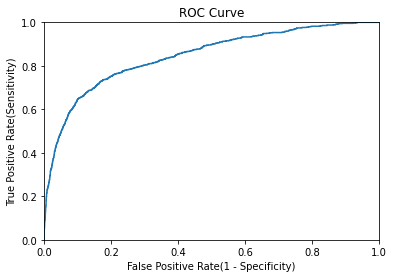

AUC :  0.8451559581371366


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = bank_data_test['y2']
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)

plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.show()

roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC : ',roc_auc)

### Threshold vs False Positive rate

After locating the optimal point on the ROC curve, we can note the false positive rate at that point. The we can use the graph below to find out the threshold value for getting that false positive rate. Although, generally we vary the threshold to suit our desired value of sensitivity or specificity first. It is a logical choice.

Text(0.5, 0, 'False Positive Rate(1 - Specificity)')

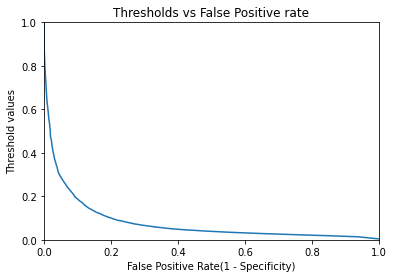

In [ ]:
plt.title('Thresholds vs False Positive rate')
plt.plot(false_positive_rate, thresholds)
plt.xlim([-0,1])
plt.ylim([-0,1])
plt.ylabel('Threshold values')
plt.xlabel('False Positive Rate(1 - Specificity)')

### AUC of Model 6 (0.845) is higher than AUC of Model 1 (0.82)
### Model 6 is a better Logistic Regression model than Model 1

## Threshold variation

### Updated Sensitivity vs Specificity with Optimal Threshold

In [ ]:
### Converting predicted values into classes using new threshold
threshold=0.1
predicted_class=[ 0 if x < threshold else 1 for x in predictions]

# Updated Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(bank_data_test["y2"], predicted_class)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[5876 1466]
 [ 223  673]]
Accuracy :  0.7949745083758194
Sensitivity :  0.8003268864069736
Specificity :  0.7511160714285714


### Comparison between Model 1 and Model 6
Model 6 has silghtly better accuracy 79.5%, Sensitivity, 80% and Specificity 75.11% than Model 1
This can be achieved atsame threshold = 0.1 for both the models.

# MODEL 7 : Desicion Tree

Building Decision Tree with full data

In [ ]:
from sklearn import tree

X_train = X_smote
y_train = y_smote

# Building the best model with high train accuracy
dtree_model7 = tree.DecisionTreeClassifier(max_leaf_nodes = 34)
dtree_model7.fit(X_train,y_train)

train_acc= dtree_model7.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= dtree_model7.score(X_test,y_test)
print("test_accuracy", test_acc)

print("Difference %", round((train_acc-test_acc)*100, 4))

train_accuracy 0.9014614982609792
test_accuracy 0.8911143481427531
Difference % 1.0347


Model 7 : Decision Tree (max leaf nodes = 34)
Train accuracy = 90.1%, Test accuracy = 89.1%. 
Model Accuracy = 89.1%

In [ ]:
predict = dtree_model7.predict(X_test)

# Confusion Matrix

cm3 = confusion_matrix(y_test, predict)
print('Confusion matrix : \n', cm3)
total3 = sum(sum(cm3))
accuracy3 = (cm3[0,0]+cm3[1,1])/total3
print("Overall Accuracy", accuracy3)

Confusion matrix : 
 [[6671  671]
 [ 226  670]]
Overall Accuracy 0.8911143481427531


## Model Validation Parameters 

In [ ]:
##### From Confusion Matrix, we calculate

# Sensitivity (Recall of Class 0)
sensitivity4 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity / Recall(0) : ', sensitivity4 )

# Precision of Class 0
precision4_0 = cm3[0,0]/(cm3[0,0]+cm3[1,0])
print('Precision Class 0 : ', precision4_0 )

# F1 Score of Class 0
F1_class0_m4 = 2/((1/precision4_0)+(1/sensitivity4))
print('F1 Score of CLass 0 : ', F1_class0_m4 )

# Specificity (Recall of Class 1)
specificity4 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity / Recall(1) : ', specificity4)

# Precision of Class 1
precision4_1 = cm3[1,1]/(cm3[0,1]+cm3[1,1])
print('Precision Class 1 : ', precision4_1 )

# F1 Score of Class 1
F1_class1_m4 = 2/((1/precision4_1)+(1/specificity4))
print('F1 Score of CLass 1 : ', F1_class1_m4 )


Sensitivity / Recall(0) :  0.9086080087169709
Precision Class 0 :  0.9672321299115557
F1 Score of CLass 0 :  0.9370040030901046
Specificity / Recall(1) :  0.7477678571428571
Precision Class 1 :  0.49962714392244595
F1 Score of CLass 1 :  0.5990165400089406


## ROC and AUC for Decision Tree
Variation of Sensitivity with Specificity

There is no concept of threshold in Decision trees. So the graph is not a real ROC curve. But the AUC of this graph can be used as a comparison measure as to which model is a better fit. Higher AUC means the model will have a higher value of sensitivity for the same specificity.

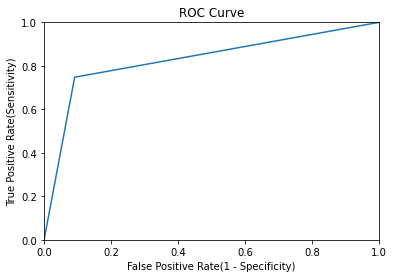

AUC :  0.8281879329299141


In [ ]:
# Getting ROC parameters
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict)

plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.show()

roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC : ',roc_auc)

### Findings
Specificity of Model 7 is 74.8%. It can predict Class 1 with 74.5% accuracy.
Sensitivity is 90.9%. AUC = 82.8%

# MODEL 8 : Random Forest
Ensemble model with all features used.

### Ensemble model
Ensemble model is built on the principle of 'wisdom of crowds'. It means that building multiple models with reasonable accuracy and collating the results gives better prediction than trying to achieve maximum accuracy from one model.

In ensemble learning, each record is evaluated by 100s of models and they give 100s of predictions for that record. The results are collated and the highest frequency value is chosen as the predicted value for that record. If the target variable is continous, the the average of the results is the predcited value.

### Bagging algorithm
Bagging  = Bootstrap sampling + Aggregating

Bootstrap sampling : If the full dataset has n observations, then the size of bootstrap sample is also n. However, each record is randomly chosen from the n records and it may be chosen more than once. Which means that a bootstrap sample may have some duplicate records as well some missing records from the original dataset.

Aggregating : A model is built on each of the bootstrap samples independently. Since there are 100s of samples, there will be 100s of independent models with 100s of predictions for every single record. The results are collated or aggregated based on the principles mentioned above. Pick higher frequency value for discrete target, and average for continuous target variable.

### Random Forest
The name itself suggests that the model has many trees with some degree of randomness. Random forest is a case of Bagging algorithm where the models being created are Decision Trees. There are a few key parameters in this model
* The number of trees being created (k) should be large. K should be in the range of 100-300. It is also known as n_estimators.
* Sample data for each tree should be bootstrap sample.
* We want every model should be independent. So we do not use all the features of the original dataset, rather we use few features. If p is number of features used in a single tree and t is the total number of features then p << t. Or we can use p in the range of sqrt(t). Every set of p features is randomly selected from the original dataset.
* Since less number of features are selected, we can be liberal in choosing the max_depth for each tree. Generally we can go for a depth which is 50% more than the stand-alone Dtree model depth built earlier.

Random forest is called a black-box model because we cannot exactly find out which of the variables are high impact variables. We cannot se at what values the split happens. We only get the final prediction as the output. So, for scenarios where understanding the model is not important, rather we need only high accuracy, Random Forest is a good choice.

In [ ]:
import scipy as sp
from sklearn.ensemble import RandomForestClassifier

# Build random forest model by selecting optimal values of hyper-parameters

forest=RandomForestClassifier(n_estimators=120, max_features=8, max_depth=7) #120
forest.fit(X_train,y_train)

##### RANDOM FOREST RESULTS #####

##### Predicting on train and test data ####
Forest_predict_train = forest.predict(X_train)
Forest_predict_test = forest.predict(X_test)

######## Train Data Validation
cm1 = confusion_matrix(y_train, Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)

total1=sum(sum(cm1))
accuracy_tree_train=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree_train)

######## Test Data Validation
cm2 = confusion_matrix(y_test, Forest_predict_test)
print("Confusion Matrix for test data \n", cm2)
total2=sum(sum(cm2))
accuracy_tree_test=(cm2[0,0]+cm2[1,1])/total2
print("Accuracy of test data \n", accuracy_tree_test)


Confusion Matrix for Train data 
 [[26822  2384]
 [ 3380 22905]]
Accuracy of Train data 
 0.89612729992251
Confusion Matrix for test data 
 [[6757  585]
 [ 357  539]]
Accuracy of test data 
 0.8856518572469045


Model accuracy  = 89.25%
## Model Validation Parameters

In [ ]:
# Test Accuracy = Model accuracy
# We can consider cm2 as the confusion matrix for model8 

##### From Confusion Matrix, we calculate

# Sensitivity (Recall of Class 0)
sensitivity4 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity / Recall(0) : ', sensitivity4 )

# Precision of Class 0
precision4_0 = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Precision Class 0 : ', precision4_0 )

# F1 Score of Class 0
F1_class0_m4 = 2/((1/precision4_0)+(1/sensitivity4))
print('F1 Score of CLass 0 : ', F1_class0_m4 )

# Specificity (Recall of Class 1)
specificity4 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity / Recall(1) : ', specificity4)

# Precision of Class 1
precision4_1 = cm2[1,1]/(cm2[0,1]+cm2[1,1])
print('Precision Class 1 : ', precision4_1 )

# F1 Score of Class 1
F1_class1_m4 = 2/((1/precision4_1)+(1/specificity4))
print('F1 Score of CLass 1 : ', F1_class1_m4 )



Sensitivity / Recall(0) :  0.9203214383001906
Precision Class 0 :  0.9498172617374192
F1 Score of CLass 0 :  0.9348367459878252
Specificity / Recall(1) :  0.6015625
Precision Class 1 :  0.4795373665480427
F1 Score of CLass 1 :  0.5336633663366337


Model 8 Random Forest gives 61% Specificity with 92.6% Sensitivity.

# MODEL 9 : Gradient Boosting Method (GBM)

### Core idea
We do not need to build the best model in one go. We build an average model first, and it will have some error. Then we keep on building models subsequently and reduce the error in each step. We stop when the error is zero (theoritically).

### Algorithm of GBM
We first a model F(x). So, y = F(x) + e1 , where e1 is the error. Then we build a model to predict e1 as e1 = H(x) + e2. So now we have y = F(x) + H(x) + e2. We keep on building subsequent models till the error is reduced to a minimum.

Too many iterations will cause over-fitting and too less will cause under-fitting. No. of iterations has to be optimal.

### Learning rate (shrinkage)
Learning rate is basically the step size of increase in accuracy. We want to have high number of iterations (steps) so that the increase in accuracy per step is low and we can fine tune the model to have best train and test accuracy. Else, if the number of iterations is low, the variations of train and test accuracy will be significant in each step. We may jum from under-fitting to over-fitting in one or two steps without actually geeting a chance to see the best possible fit. Learning rate usually varies between 0.1 and 0.0001. 

y = F(x) + P.H(x) + e2 , where P is the learning rate.

P = 0.1 will increase the iterations by 10 times, P = 0.01 will increase it by 100 times and so on.


In [ ]:
from sklearn.metrics import f1_score
import time
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_boost=GradientBoostingClassifier(n_estimators=250,learning_rate=0.005, verbose=1) 

## Fitting the gradient boost classifier
start_time = time.time()
gbm_boost.fit(X_train,y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.3786           23.60s
         2           1.3737           23.53s
         3           1.3688           23.35s
         4           1.3640           23.06s
         5           1.3593           23.19s
         6           1.3546           23.19s
         7           1.3499           23.20s
         8           1.3453           23.23s
         9           1.3408           23.65s
        10           1.3362           23.70s
        20           1.2922           22.55s
        30           1.2516           21.38s
        40           1.2146           20.31s
        50           1.1807           19.21s
        60           1.1496           18.14s
        70           1.1209           17.17s
        80           1.0934           16.20s
        90           1.0685           15.25s
       100           1.0466           14.29s
       200           0.8810            4.85s
Time taken by GBM 24.100024461746216 Seconds


## GBM Results

In [ ]:
### Predicting Gradient boosting model on the train Data
gbm_predict_train = gbm_boost.predict(X_train)
gbm_predict_test = gbm_boost.predict(X_test)

######## Train Data Validation
cm1 = confusion_matrix(y_train, gbm_predict_train)
print("Confusion Matrix for Train data \n", cm1)

total1=sum(sum(cm1))
accuracy_gbm_train=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_gbm_train)

######## Test Data Validation
cm2 = confusion_matrix(y_test, gbm_predict_test)
print("Confusion Matrix for test data \n", cm2)
total2=sum(sum(cm2))
accuracy_gbm_test=(cm2[0,0]+cm2[1,1])/total2
print("Accuracy of test data \n", accuracy_gbm_test)


######## F1 score for train data
accuracy_train=f1_score(y_train, gbm_predict_train, average='micro') 
print("train accuracy", accuracy_train)

######## F1 score for test data
accuracy_test=f1_score(y_test, gbm_predict_test, average='micro') 
print("test accuracy", accuracy_test)

# *** From the results, we find that,
# *** F1_score(train_data) = CM_accuracy(train_data)
# *** F1_score(test_data) = CM_accuracy(test_data)

Confusion Matrix for Train data 
 [[25091  4115]
 [ 2325 23960]]
Accuracy of Train data 
 0.8839451442576274
Confusion Matrix for test data 
 [[6356  986]
 [ 147  749]]
Accuracy of test data 
 0.8624666181111921
train accuracy 0.8839451442576274
test accuracy 0.8624666181111921


Model accuracy = test accuracy = 86.2%
## Model Validation Parameters



In [ ]:
# Model accuracy is found from confusion matrix cm2 

##### From Confusion Matrix, we calculate

# Sensitivity (Recall of Class 0)
sensitivity4 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity / Recall(0) : ', sensitivity4 )

# Precision of Class 0
precision4_0 = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Precision Class 0 : ', precision4_0 )

# F1 Score of Class 0
F1_class0_m4 = 2/((1/precision4_0)+(1/sensitivity4))
print('F1 Score of CLass 0 : ', F1_class0_m4 )

# Specificity (Recall of Class 1)
specificity4 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity / Recall(1) : ', specificity4)

# Precision of Class 1
precision4_1 = cm2[1,1]/(cm2[0,1]+cm2[1,1])
print('Precision Class 1 : ', precision4_1 )

# F1 Score of Class 1
F1_class1_m4 = 2/((1/precision4_1)+(1/specificity4))
print('F1 Score of CLass 1 : ', F1_class1_m4 )


Sensitivity / Recall(0) :  0.8657041678016889
Precision Class 0 :  0.9773950484391819
F1 Score of CLass 0 :  0.9181654026724448
Specificity / Recall(1) :  0.8359375
Precision Class 1 :  0.43170028818443806
F1 Score of CLass 1 :  0.5693652603572786


### Model 9 GBM Model gives 83.6% Specificity with 86.6% Sensitivity.


# MODEL 10 : XGB (Extreme Gradient Boosting)
Though both GBM and XGB give similar results, we will still build this model for the sake of comparison.

XGB works on the same principle as GBM. Accuracy is almost the same as GBM as well. However the excution is much faster. There are two reasons for this.
1. Data is converted into D-Matrix format. Matrices are excuted much faster than dataframes.
2. It uses GPU Runtime which has massive parallel processing capability.

### XGB hyper parameters
* max_depth : max_depth of each DTree in the model. We choose max_depth as 50% of the depth of the stand-alone Decision tree model that we had built earlier. Smaller trees will learn less and hence prolong the algorithm. Prolonging algorithm will help in identifying the optimal accuracy with more precision.

* eta : learning rate. eta =  0.1 or less.

* eval metric : Type of error. 'merror' is multi-class classification error.

* tree_method : 'gpu_hist' to enable GPU Usage.

* num_class : Number of classes in target variable. Here we have 2.

* params : A dictionary of above parameters.

* dtrain : Input train data in matrix format

* num_boost_round : Number of iterations. We have the liberty in XGB to choose this as a very high number because we have a stopping criteria. When the stopping criteria is met, XGB processing will end irrespective of the number of iterations. It prevents over-fitting.

* early_stopping_rounds : The number of rounds where, if the test error does not improve reasonably, the execution is stopped. If it is 4, then the model will stop execution if for 4 consecutive iterations there is no reasonable improvement in test error.

* evals : evaluation or validation matrix. [(matrix_test, 'test')] means test D-Matrix.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#Creating XGB Friendly data and matrices

train_labels = y_train.values
test_labels = y_test.values
full_labels = y.values

matrix_train = xgboost.DMatrix(X_train,label=train_labels)
matrix_test = xgboost.DMatrix(X_test,label=test_labels))

(55491, 57)
(55491,)
(8238, 57)
(8238,)


In [ ]:
params = {
    'max_depth': 4, 
    'eta':0.01, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 2
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=1000,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve. 
                    evals=[(matrix_test,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.143481
Will train until test-merror hasn't improved in 4 rounds.
[1]	test-merror:0.143481
[2]	test-merror:0.143481
[3]	test-merror:0.143481
[4]	test-merror:0.143481
Stopping. Best iteration:
[0]	test-merror:0.143481

Time taken by XGB 0.24000787734985352 Seconds


## XGB results

In [ ]:
### Prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm1 = confusion_matrix(train_labels,boost_predict_train)
print(cm1)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro') 
print("train accuracy", accuracy_train)

### Prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm2 = confusion_matrix(test_labels,boost_predict_test)
print(cm2)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)

print('Model Accuracy = ', accuracy_test)


[[24933  4273]
 [ 3195 23090]]
train accuracy 0.8654196175956461
[[6315 1027]
 [ 155  741]]
test accuracy 0.8565185724690458
Model Accuracy =  0.8565185724690458


## Model validation Parameters

In [ ]:
# Confusion Matrix cm2 can be used for Model accuracy

##### From Confusion Matrix, we calculate

# Sensitivity (Recall of Class 0)
sensitivity4 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity / Recall(0) : ', sensitivity4 )

# Precision of Class 0
precision4_0 = cm2[0,0]/(cm2[0,0]+cm2[1,0])
print('Precision Class 0 : ', precision4_0 )

# F1 Score of Class 0
F1_class0_m4 = 2/((1/precision4_0)+(1/sensitivity4))
print('F1 Score of CLass 0 : ', F1_class0_m4 )

# Specificity (Recall of Class 1)
specificity4 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity / Recall(1) : ', specificity4)

# Precision of Class 1
precision4_1 = cm2[1,1]/(cm2[0,1]+cm2[1,1])
print('Precision Class 1 : ', precision4_1 )

# F1 Score of Class 1
F1_class1_m4 = 2/((1/precision4_1)+(1/specificity4))
print('F1 Score of CLass 1 : ', F1_class1_m4 )


Sensitivity / Recall(0) :  0.8601198583492237
Precision Class 0 :  0.9760432766615147
F1 Score of CLass 0 :  0.9144222415291051
Specificity / Recall(1) :  0.8270089285714286
Precision Class 1 :  0.41911764705882354
F1 Score of CLass 1 :  0.5563063063063064


### Model 10 XGB Model gives 82.7% Specificity with 86% Sensitivity.

### Model 9 results are similar to this. Model 9 is slightly better than Model 10. 


# Finalizing the Model
### Selecting Model 9 - Gradient Boosting Method as the best model with highest Specificity, Sensitivity and overall accuracy. Specificity = 83.6%, Sensitivity = 86.6% and overall accuracy = 86.2%.

### Model Comparisons


|Sl no	|Model no	|Model Description				|Accuracy	|Sensitivity	|F1 score 0	|Specificity	|F1 score 1	|ROC AUC|
|-------|:----------|:------------------------------|:----------|:--------------|:----------|:--------------|:----------|:------|
|1		|1			|Simple logistic regression		|89.7		|98.3			|94.4		|21.4			|32	        |       |
|2		|2			|Simple logistic 2				|89.8		|			    |           |               |           |       |
|3		|3			|Simple logistic 3				|89.7		|			    |           |               |           |       |
|4		|1			|Simple Logit. Threshold = 0.1	|75.5		|75.5			|			|76 			|			|0.82   |
|5		|4			|Simple Decision Tree			|91.6		|97				|95.3		|47.4			|55.1	    |       |
|6		|5			|Dtree with balanced data		|87.1		|87.2			|92.4		|86.4			|59.4	    |       |
|7		|6			|Logistic with FE full data		|86.8		|91.6			|92.5		|47.4			|43.8		|0.845  |
|8		|6			|Logit. Threshold = 0.1			|79.5		|80				|			|75.1           |           |       |
|9		|7			|Dtree with FE full data		|89.1		|90.9			|93.7		|74.8			|60	        |       |
|10		|8			|RF with full FE data			|89.3		|92				|93.5		|60.1			|53.4	    |       |
|11		|9			|GBM with full FE data			|86.2		|86.6			|91.8		|83.6			|56.9	    |       |
|12		|10			|XGB with full FE data			|85.7		|86				|91.4		|82.7			|55.6	    |       |

------------------